# import Library

In [1]:
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
from enum import Enum
import pandas as pd
import time
from collections import defaultdict
from collections import namedtuple
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
import io
import re
from collections import namedtuple
from collections import deque
import tensorflow as tf
from tensorflow.python import keras as K
from PIL import Image
import matplotlib.pyplot as plt
import random
# from mylibrary.fnframework import FNAgent,Environment,Action,Trainer
# from mylibrary.plottrade import PlotTrade
# from mylibrary.maketraindata import MakeTrainData
import xgboost as xgb
from sklearn.metrics import accuracy_score  
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from tensorflow.python.keras.models import load_model
import statsmodels.graphics.api as smg
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from scipy.stats import f
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, accuracy_score,roc_curve, roc_auc_score
import pickle
import datetime
from sklearn import preprocessing
from sklearn.metrics import r2_score
import copy
import optuna
from keras.callbacks import EarlyStopping
sys.path.append('../')
from my_library.library import *

Using TensorFlow backend.


# path ubu

In [2]:
path_daw = '/home/hipro/デスクトップ/StockPriceData/Stock_index/DAW_10years.csv'
path_tpx = '/home/hipro/デスクトップ/StockPriceData/Stock_index/TOPIX_10years.csv'


# path mac

In [2]:
path_tpx = '/Users/rince/Desktop/StockPriceData/Stock_index/TOPIX_10years.csv'
path_225 = '/Users/rince/Desktop/StockPriceData/Stock_index/NK225_10years.csv'
path_daw = '/Users/rince/Desktop/StockPriceData/Stock_index/DAW_10years.csv'
path_bear = '/Users/rince/Desktop/StockPriceData/Stock_index/R225BEAR_10years.csv'

# path win

In [2]:
path_tpx = '/Users/Owner/Desktop/StockPriceData/Stock_index/TOPIX_10years.csv'
path_225 = '/Users/Owner/Desktop/StockPriceData/Stock_index/NK225_10years.csv'
path_daw = '/Users/Owner/Desktop/StockPriceData/Stock_index/DAW_10years.csv'
path_bear = '/Users/Owner/Desktop/StockPriceData/Stock_index/R225BEAR_10years.csv'

path_tpx_sim = '/Users/Owner/Desktop/StockPriceData/TOPIX/TOPIX_20211208.csv'
path_daw_sim = '/Users/Owner/Desktop/StockPriceData/DAW/DAW_20211208.csv'

# 標準化　行で標準化した例


# main

# アイデア
reward で評価損益をあたえてみる

# 減衰探索

[23:14:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


---------------------
AUC train: 0.8308524331977981
AUC test : 0.6724830795262268
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       394
           1       0.63      0.65      0.64       420

    accuracy                           0.62       814
   macro avg       0.62      0.62      0.62       814
weighted avg       0.62      0.62      0.62       814



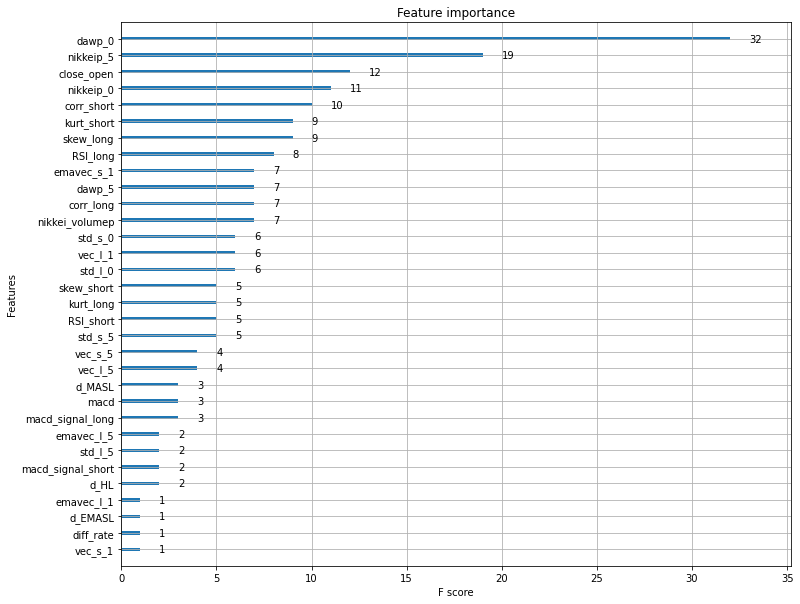

In [3]:
lx = LearnXGB()
lx.learn_xgb(path_tpx,path_daw)

# state_list

In [4]:
states=[
    'std',
    'change_rate',
    'corr',
    'high_low',
    'close_open',
    'vec',
    'ema_vec',
    'macd',
    'skew',
    'kurt',
    'RSI'
    # 'drop_proba'
]

In [5]:
lq = LearnQN(lx)
state_ , chart_ = lq.make_df_state(path_tpx,path_daw)
state_ ,chart_ = lq.make_state(path_tpx,path_daw,state_,chart_,states=states, ma_short=5,ma_long=25)

----------------------
episode : 0
Done initialization. From now, begin training!
train reward


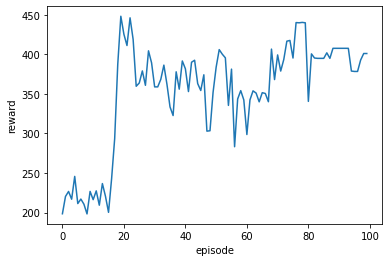

validate data reward


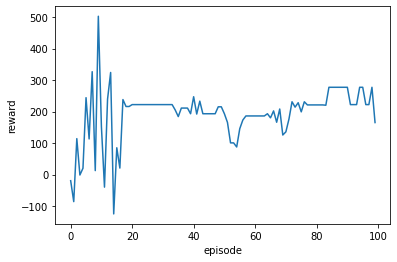

No handles with labels found to put in legend.


episode : 0
Get reward 165.0.
Trade count 2.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

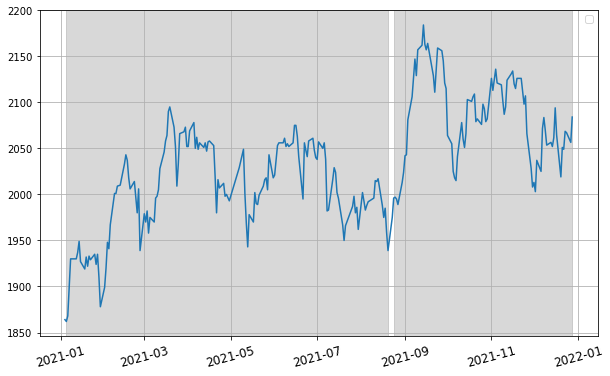

In [6]:
lq.learn(path_tpx,path_daw,state_,chart_,env_type='sigmoid',episode_count=100,train_year=2020,test_year=2021,is_sarsa=True)

In [7]:
train_reward, test_reward = lq.return_reward_log()
# lq_tmp.state = state1
lq.state = state2
pr = lq.return_profit_rate(path_tpx,path_daw)

AttributeError: 'LearnQN' object has no attribute 'train_reward_log'

# 訓練期間　2019~2020, buffer_size=8*1024, byffer_size = 2 * 8 * 32

state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
Done Early Stopping
check_point episode : 151
update_count        : 4
best rewards        : 457.8719371507788
train reward


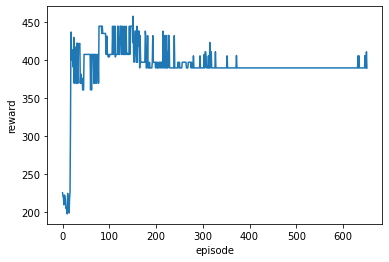

validate data reward


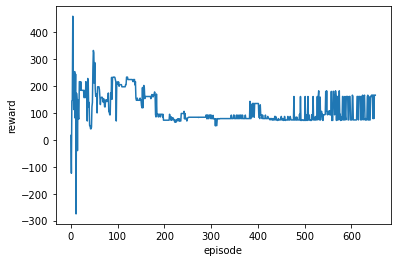

No handles with labels found to put in legend.


episode : 0
Get reward 166.0.
Trade count 3.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

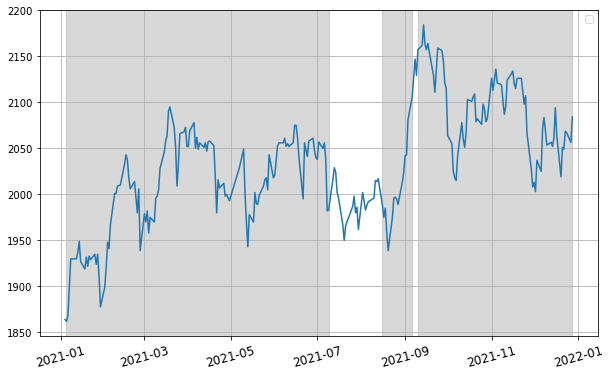

time : 1641.9079504013062
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 30
update_count        : 6
best rewards        : 446.05885479860086
train reward


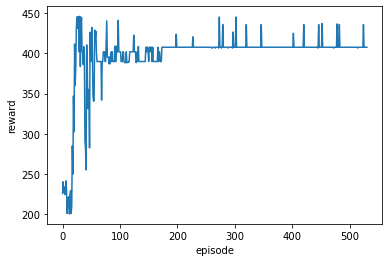

validate data reward


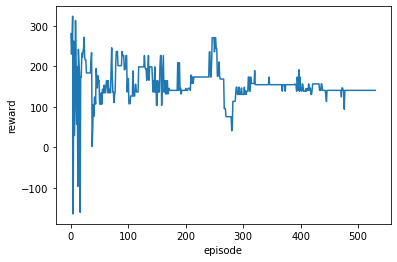

No handles with labels found to put in legend.


episode : 0
Get reward 141.0.
Trade count 5.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

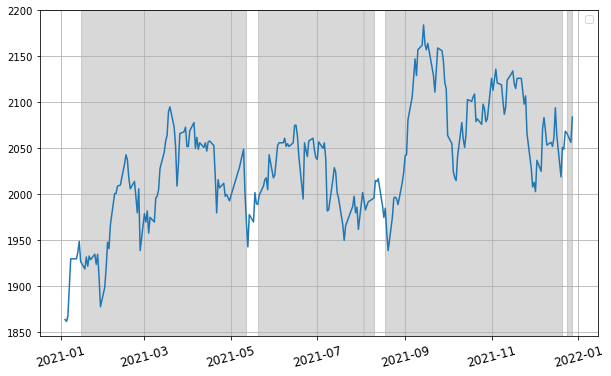

time : 1333.4596676826477
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 32
update_count        : 8
best rewards        : 414.78959546502404
train reward


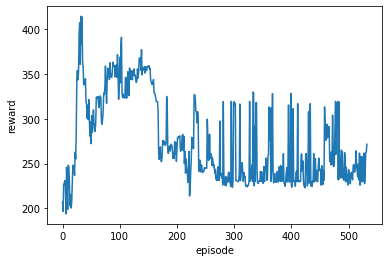

validate data reward


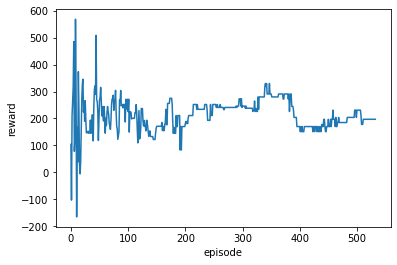

No handles with labels found to put in legend.


episode : 0
Get reward 197.0.
Trade count 5.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

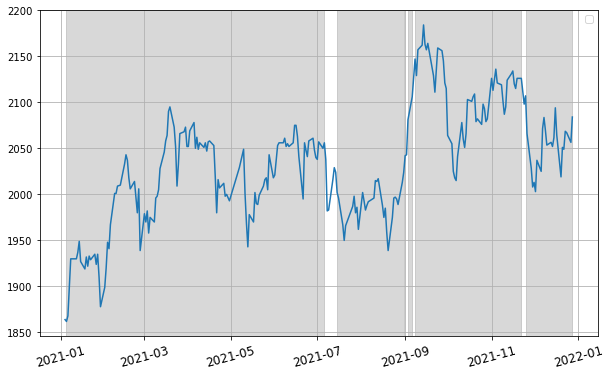

time : 1333.167444229126
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 42
update_count        : 7
best rewards        : 453.96081341977884
train reward


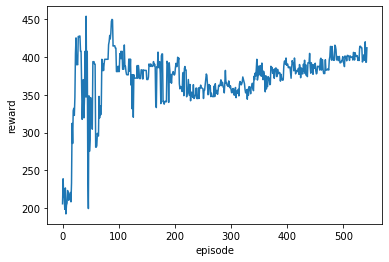

validate data reward


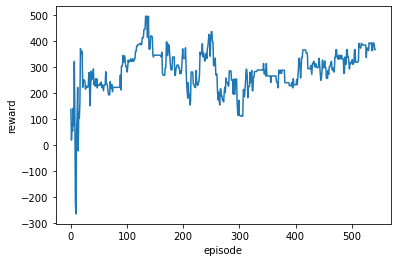

No handles with labels found to put in legend.


episode : 0
Get reward 367.5.
Trade count 13.
Tomorrow action : Action.SELL


<Figure size 432x288 with 0 Axes>

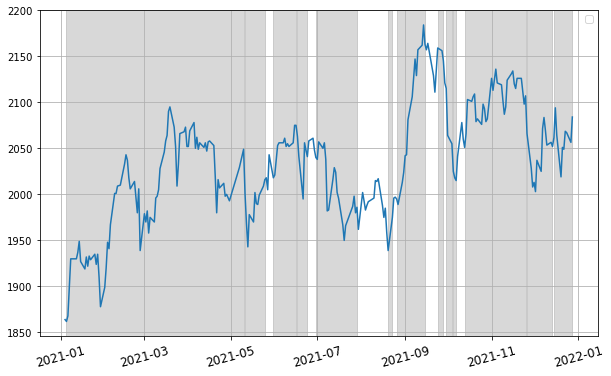

time : 1456.922559261322
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
----------------------
episode : 800
----------------------
episode : 900
Done Early Stopping
check_point episode : 429
update_count        : 5
best rewards        : 449.12217268872564
train reward


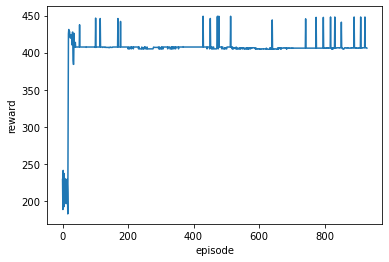

validate data reward


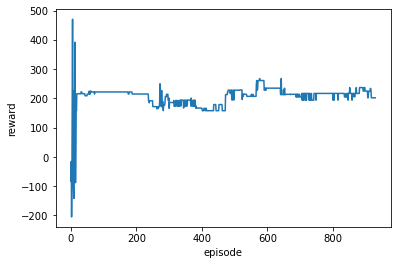

No handles with labels found to put in legend.


episode : 0
Get reward 202.0.
Trade count 4.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

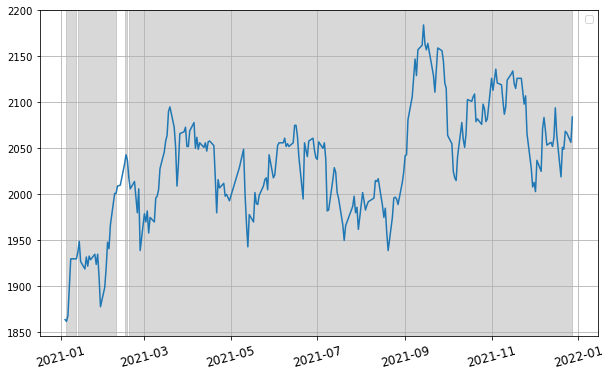

time : 2548.071400165558
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 26
update_count        : 6
best rewards        : 451.54259627096764
train reward


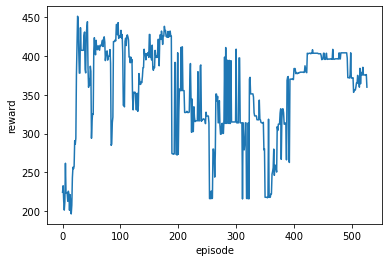

validate data reward


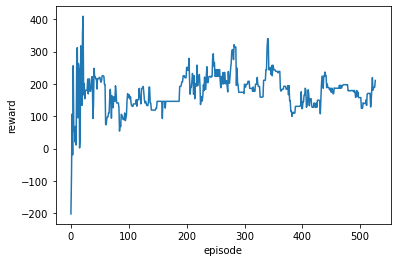

No handles with labels found to put in legend.


episode : 0
Get reward 210.5.
Trade count 10.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

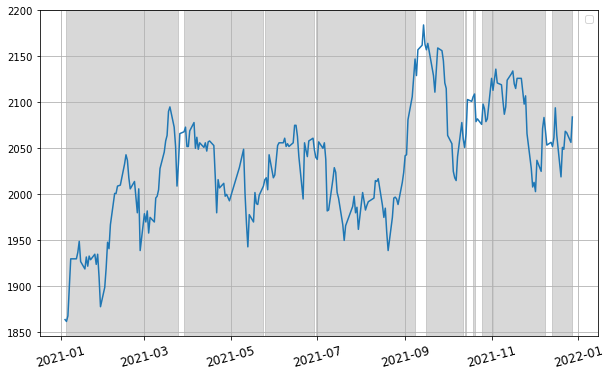

time : 1318.2244000434875
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
----------------------
episode : 800
----------------------
episode : 900
train reward


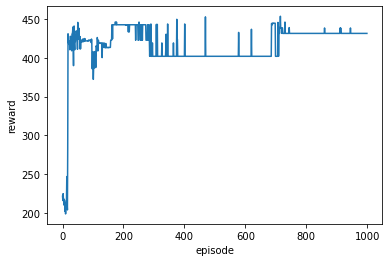

validate data reward


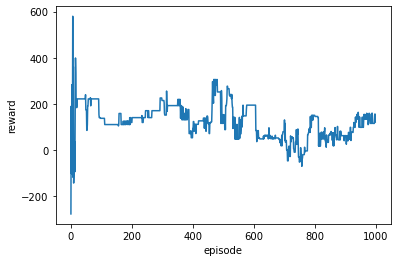

No handles with labels found to put in legend.


episode : 0
Get reward 122.0.
Trade count 8.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

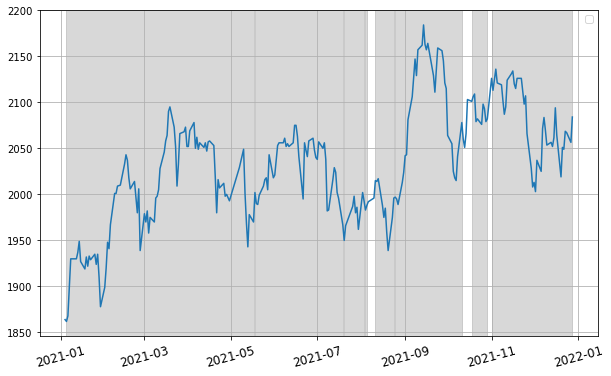

time : 2529.5576627254486
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
----------------------
episode : 800
Done Early Stopping
check_point episode : 379
update_count        : 11
best rewards        : 447.62217657817683
train reward


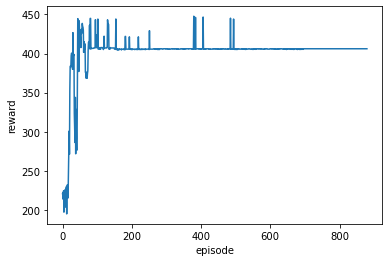

validate data reward


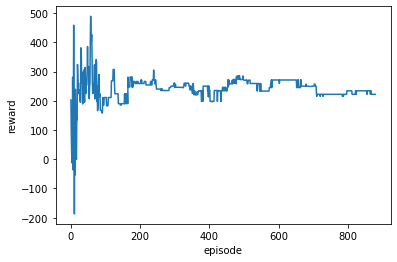

No handles with labels found to put in legend.


episode : 0
Get reward 222.0.
Trade count 1.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

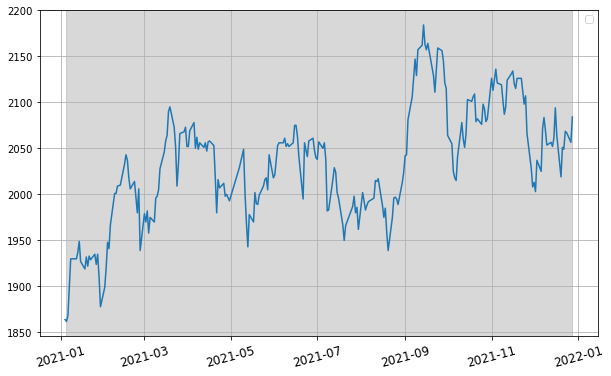

time : 2228.4317355155945
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 22
update_count        : 3
best rewards        : 441.2642538341841
train reward


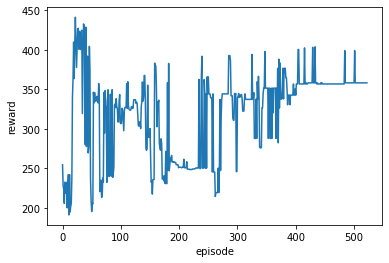

validate data reward


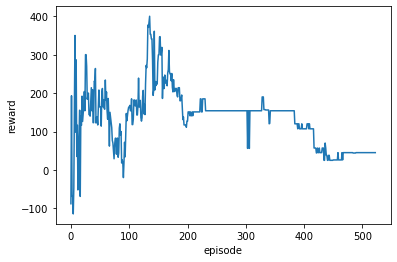

No handles with labels found to put in legend.


episode : 0
Get reward 45.0.
Trade count 2.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

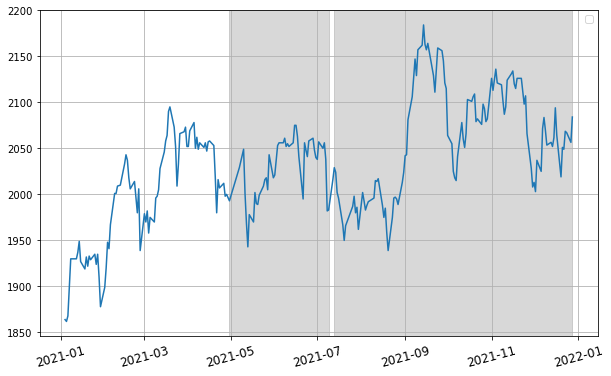

time : 1299.0875673294067
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 63
update_count        : 5
best rewards        : 454.43004743453696
train reward


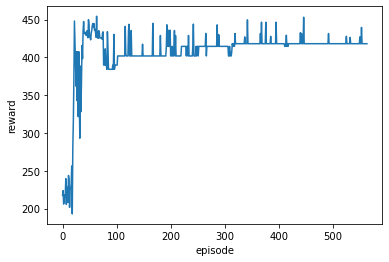

validate data reward


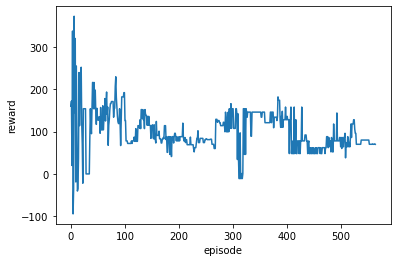

No handles with labels found to put in legend.


episode : 0
Get reward 70.0.
Trade count 3.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

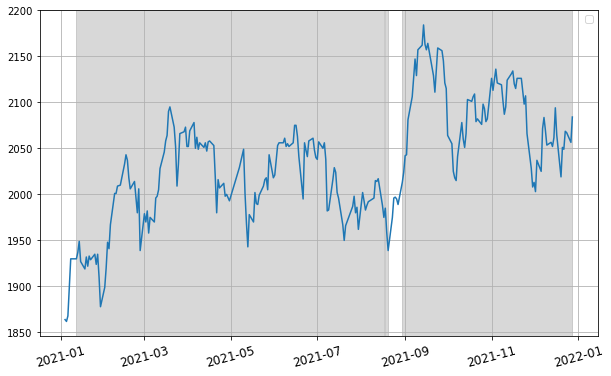

time : 1512.2052235603333
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 30
update_count        : 4
best rewards        : 443.7915574862771
train reward


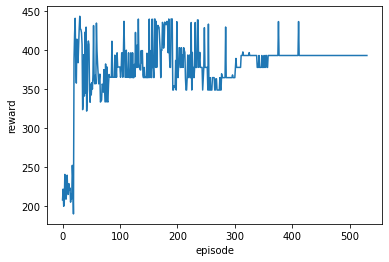

validate data reward


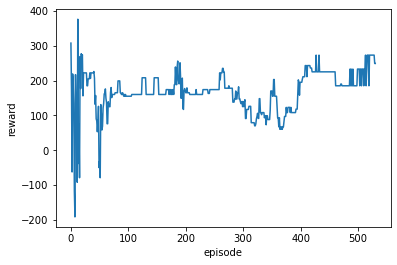

No handles with labels found to put in legend.


episode : 0
Get reward 249.0.
Trade count 4.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

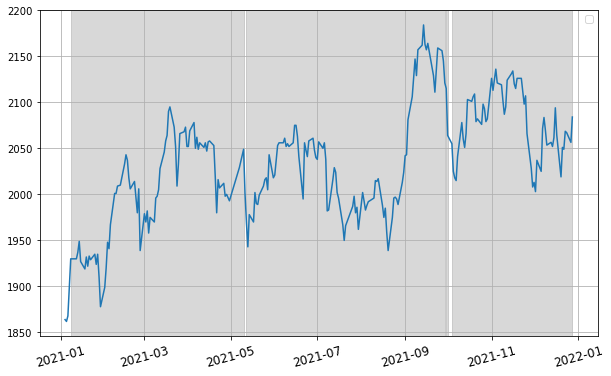

time : 1770.5710327625275
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 22
update_count        : 2
best rewards        : 449.12217268872564
train reward


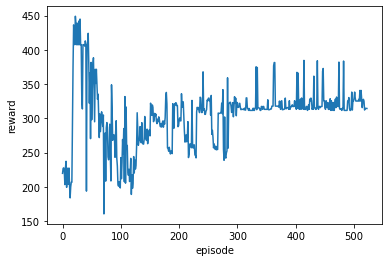

validate data reward


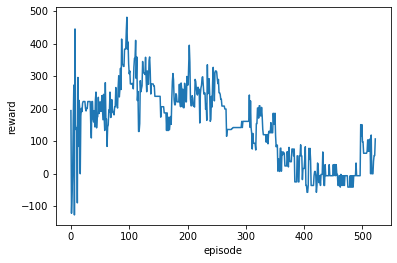

No handles with labels found to put in legend.


episode : 0
Get reward 107.0.
Trade count 12.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

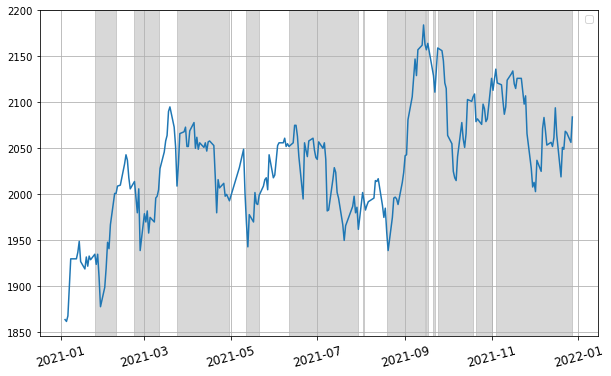

time : 1746.823476076126
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 71
update_count        : 3
best rewards        : 455.18144051388487
train reward


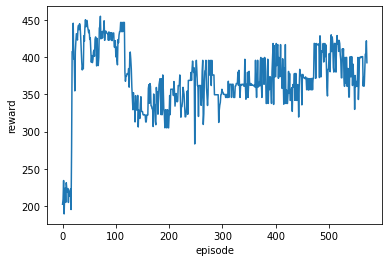

validate data reward


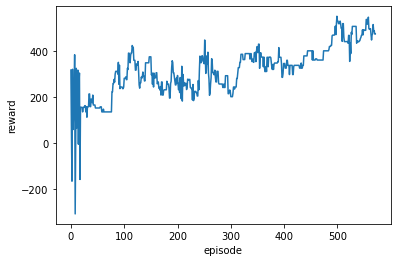

No handles with labels found to put in legend.


episode : 0
Get reward 473.0.
Trade count 9.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

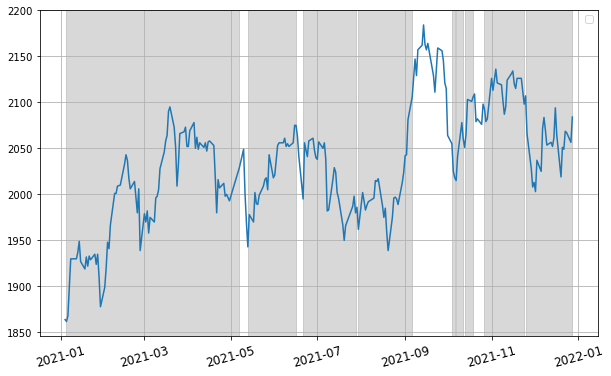

time : 1917.120332479477
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 30
update_count        : 4
best rewards        : 441.0588509147474
train reward


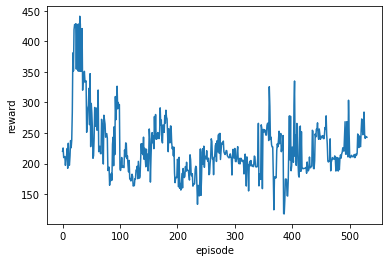

validate data reward


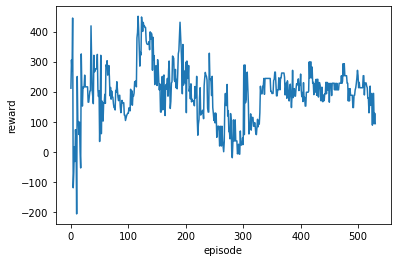

No handles with labels found to put in legend.


episode : 0
Get reward 93.5.
Trade count 5.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

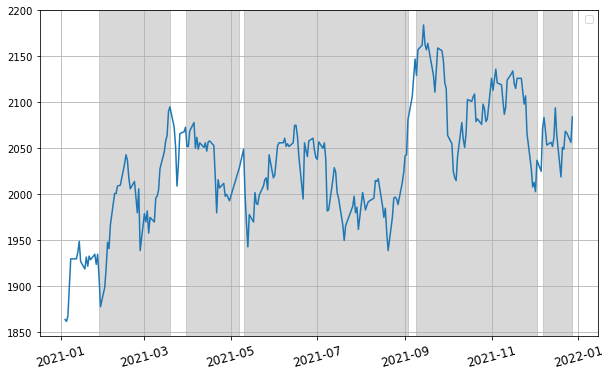

time : 1804.6766035556793
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
----------------------
episode : 800
----------------------
episode : 900
Done Early Stopping
check_point episode : 426
update_count        : 9
best rewards        : 454.4944772124342
train reward


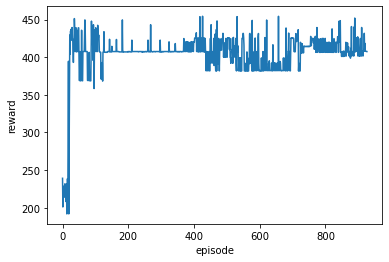

validate data reward


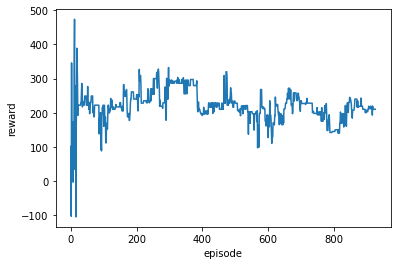

No handles with labels found to put in legend.


episode : 0
Get reward 210.0.
Trade count 3.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

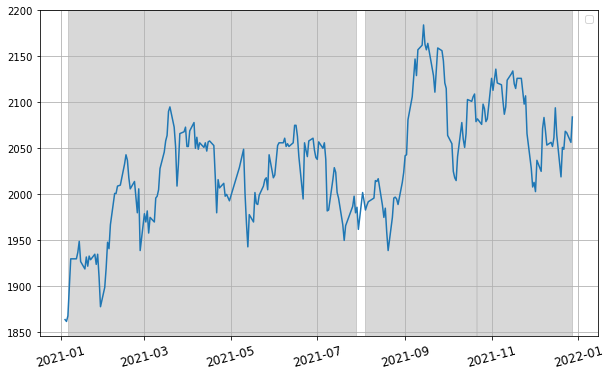

time : 3171.3167564868927
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
Done Early Stopping
check_point episode : 190
update_count        : 5
best rewards        : 439.6429414403397
train reward


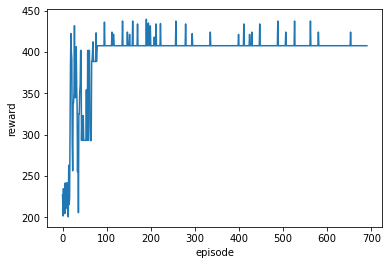

validate data reward


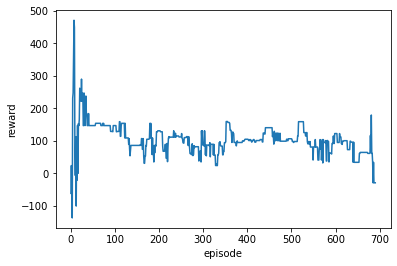

No handles with labels found to put in legend.


episode : 0
Get reward -29.0.
Trade count 6.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

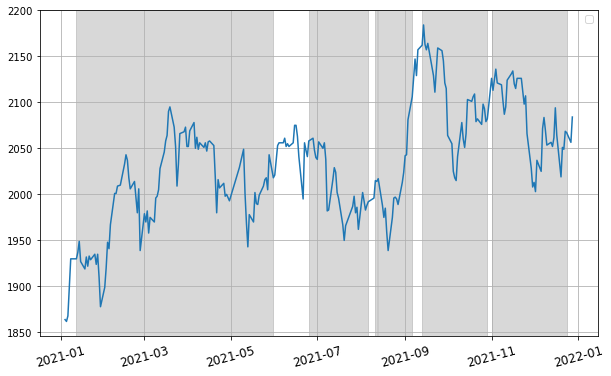

time : 2477.2611825466156
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 49
update_count        : 5
best rewards        : 439.76378628640515
train reward


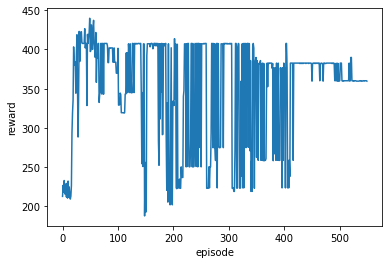

validate data reward


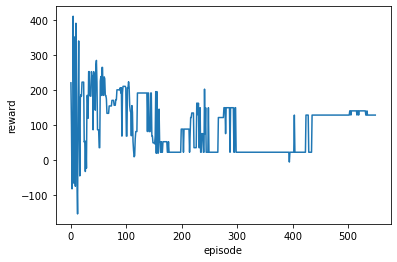

No handles with labels found to put in legend.


episode : 0
Get reward 128.0.
Trade count 2.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

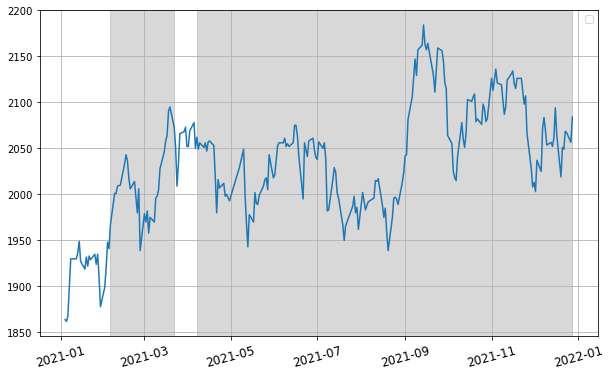

time : 1840.0929536819458
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 28
update_count        : 5
best rewards        : 453.9319558846808
train reward


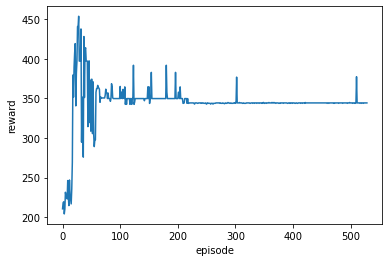

validate data reward


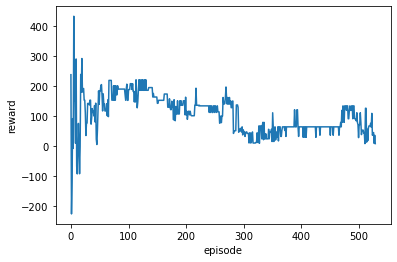

No handles with labels found to put in legend.


episode : 0
Get reward 9.0.
Trade count 7.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

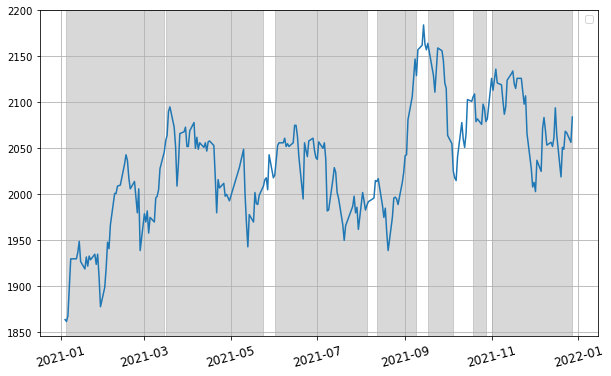

time : 1902.4125368595123
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 45
update_count        : 6
best rewards        : 460.3964913628419
train reward


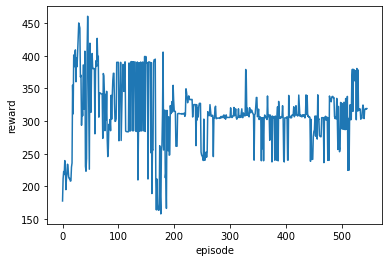

validate data reward


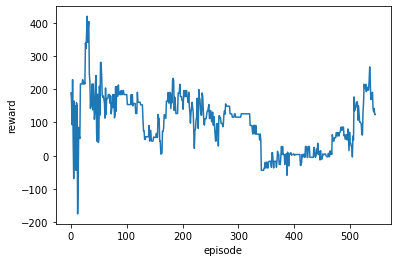

No handles with labels found to put in legend.


episode : 0
Get reward 124.0.
Trade count 10.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

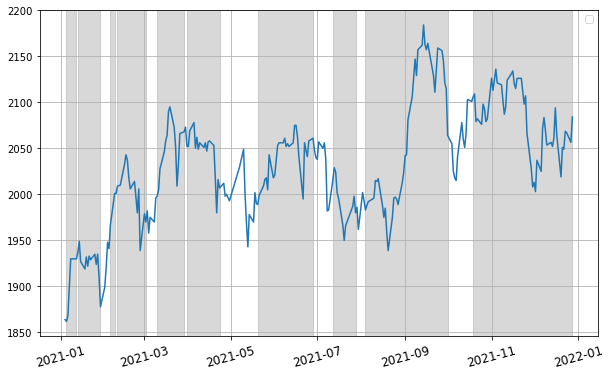

time : 1855.4075355529785
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : sigmoid
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 71
update_count        : 6
best rewards        : 453.6539139122306
train reward


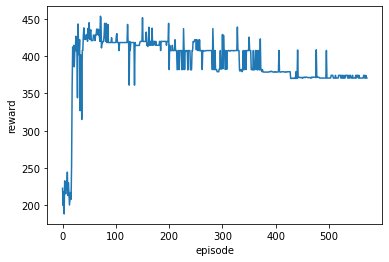

validate data reward


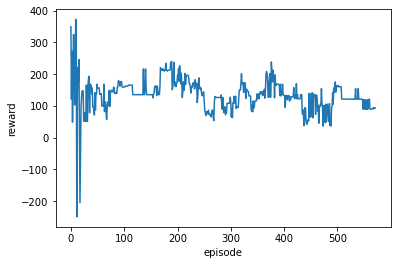

No handles with labels found to put in legend.


episode : 0
Get reward 93.0.
Trade count 15.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

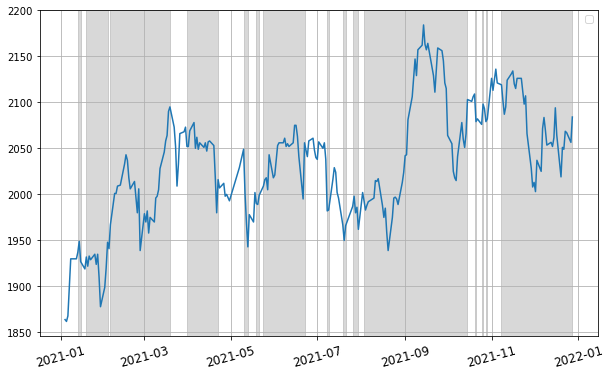

time : 1940.7434265613556
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 77
update_count        : 13
best rewards        : 353.423587228379
train reward


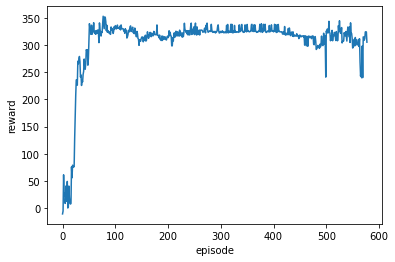

validate data reward


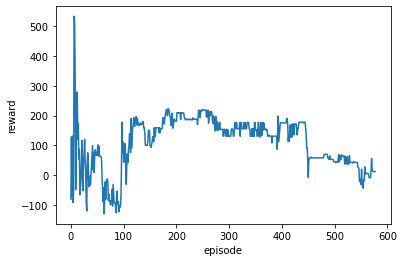

No handles with labels found to put in legend.


episode : 0
Get reward 11.5.
Trade count 20.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

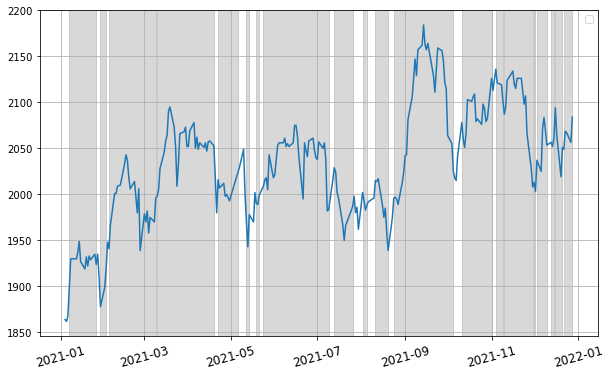

time : 1466.7024989128113
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
Done Early Stopping
check_point episode : 110
update_count        : 15
best rewards        : 394.0609095108313
train reward


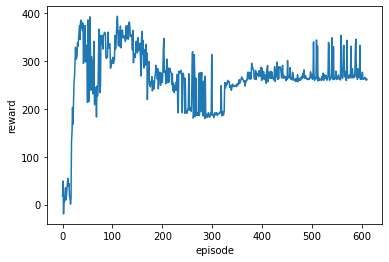

validate data reward


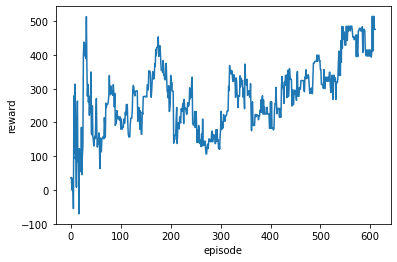

No handles with labels found to put in legend.


episode : 0
Get reward 475.5.
Trade count 23.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

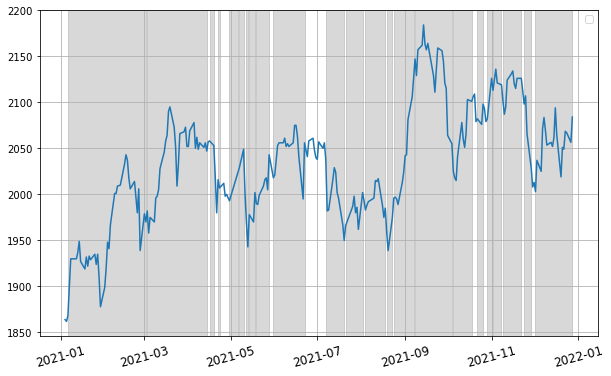

time : 1550.414708852768
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 96
update_count        : 13
best rewards        : 426.3832893118037
train reward


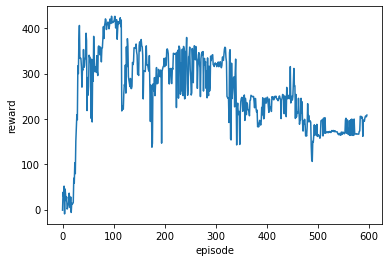

validate data reward


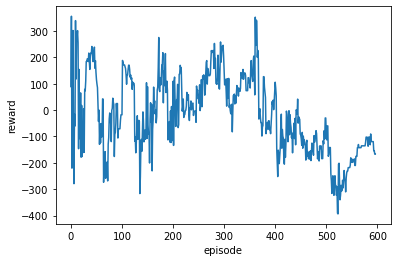

No handles with labels found to put in legend.


episode : 0
Get reward -167.0.
Trade count 11.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

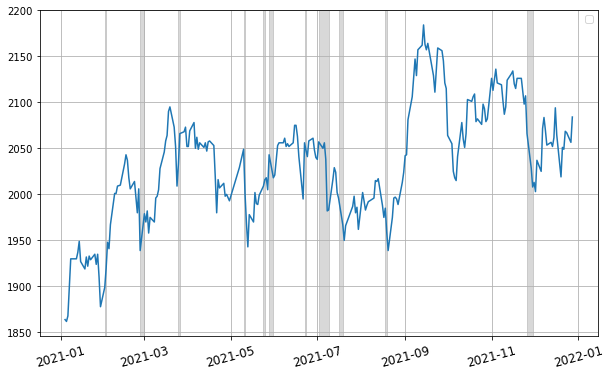

time : 1488.3106260299683
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 36
update_count        : 5
best rewards        : 436.25633269670004
train reward


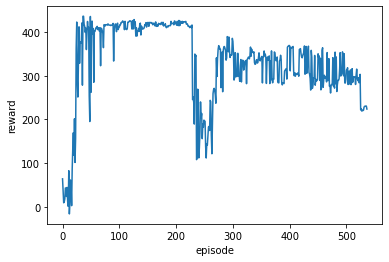

validate data reward


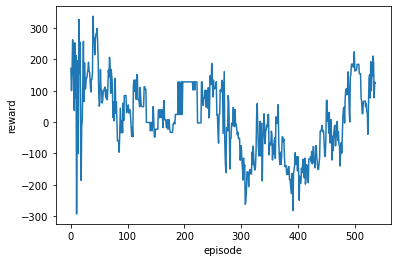

No handles with labels found to put in legend.


episode : 0
Get reward 125.0.
Trade count 11.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

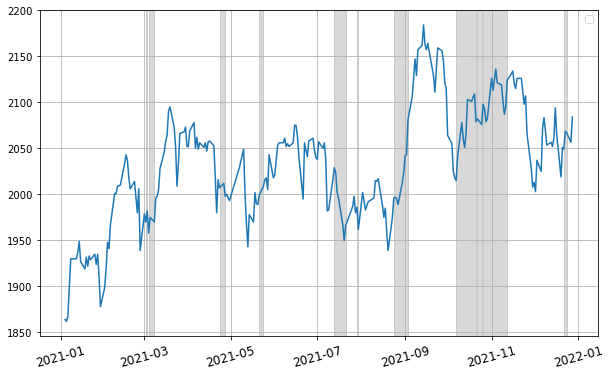

time : 1423.2884719371796
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
Done Early Stopping
check_point episode : 138
update_count        : 18
best rewards        : 418.4214047223952
train reward


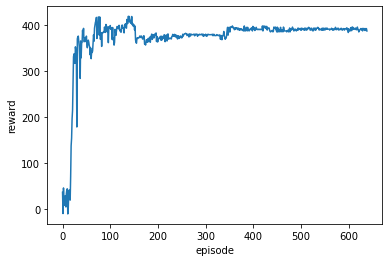

validate data reward


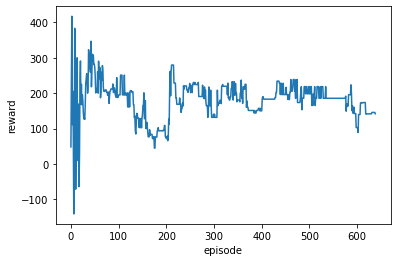

No handles with labels found to put in legend.


episode : 0
Get reward 141.5.
Trade count 17.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

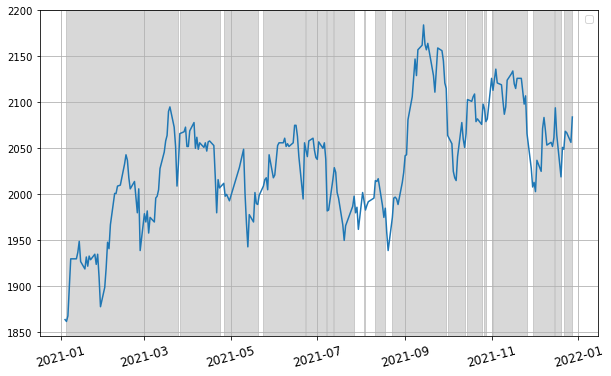

time : 1668.8921217918396
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
----------------------
episode : 800
----------------------
episode : 900
train reward


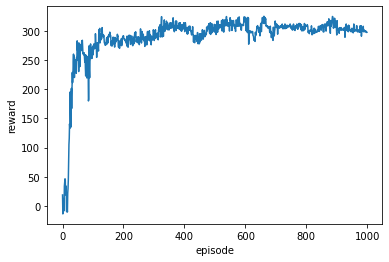

validate data reward


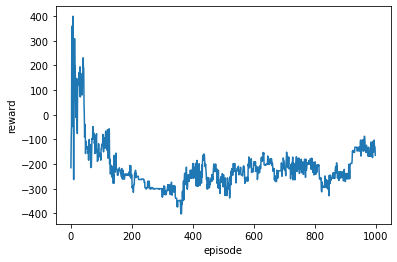

No handles with labels found to put in legend.


episode : 0
Get reward -164.5.
Trade count 26.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

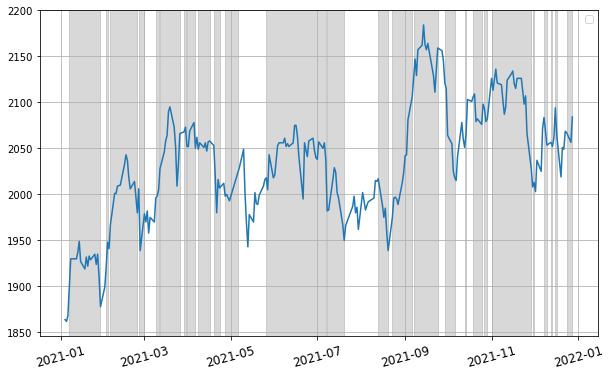

time : 2621.5170052051544
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
Done Early Stopping
check_point episode : 115
update_count        : 16
best rewards        : 252.86499540434124
train reward


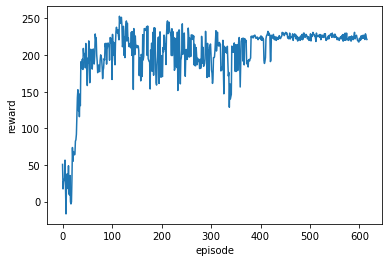

validate data reward


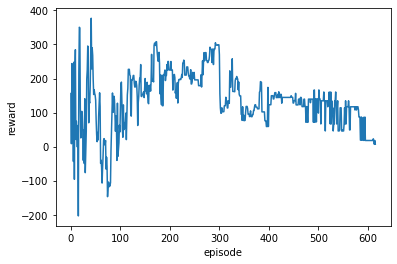

No handles with labels found to put in legend.


episode : 0
Get reward 7.0.
Trade count 12.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

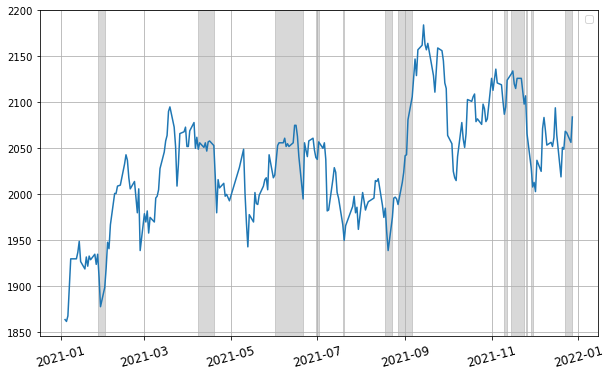

time : 1533.4491782188416
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
Done Early Stopping
check_point episode : 253
update_count        : 10
best rewards        : 419.56783630097755
train reward


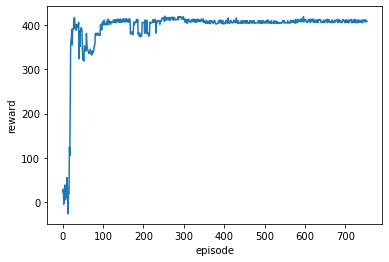

validate data reward


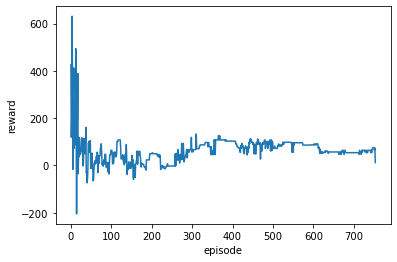

No handles with labels found to put in legend.


episode : 0
Get reward 12.0.
Trade count 12.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

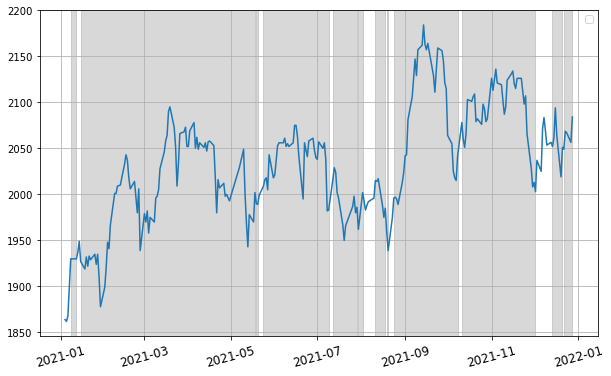

time : 1910.203498840332
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 36
update_count        : 13
best rewards        : 366.1852121189485
train reward


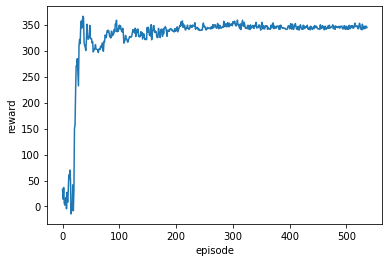

validate data reward


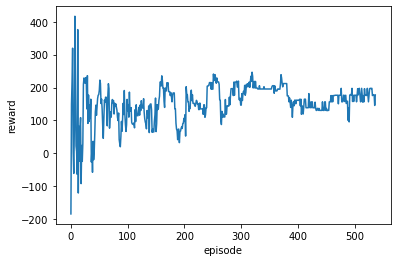

No handles with labels found to put in legend.


episode : 0
Get reward 177.5.
Trade count 19.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

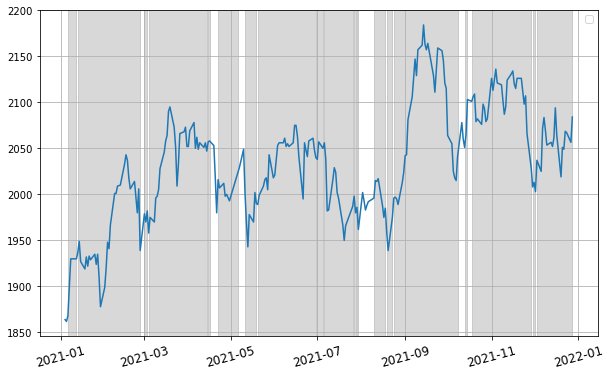

time : 1352.9637727737427
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 52
update_count        : 12
best rewards        : 277.77637844962635
train reward


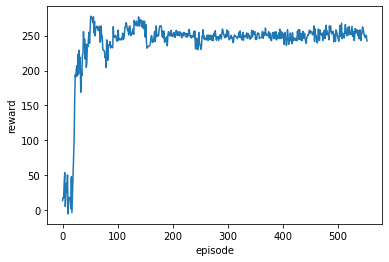

validate data reward


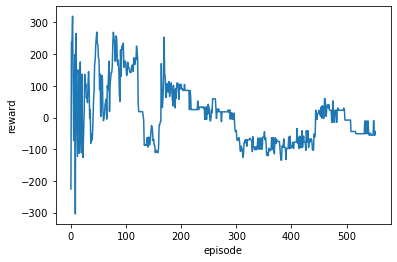

No handles with labels found to put in legend.


episode : 0
Get reward -44.0.
Trade count 25.
Tomorrow action : Action.SELL


<Figure size 432x288 with 0 Axes>

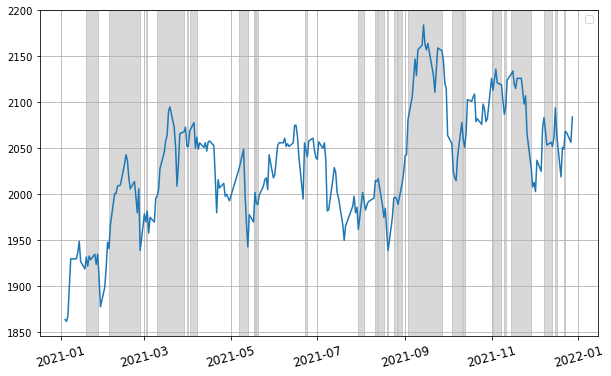

time : 1373.8111498355865
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
----------------------
episode : 800
Done Early Stopping
check_point episode : 392
update_count        : 24
best rewards        : 356.05495505569445
train reward


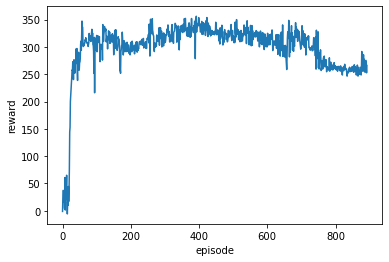

validate data reward


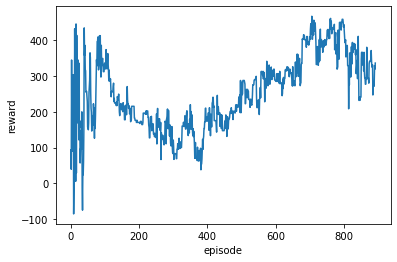

No handles with labels found to put in legend.


episode : 0
Get reward 335.5.
Trade count 18.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

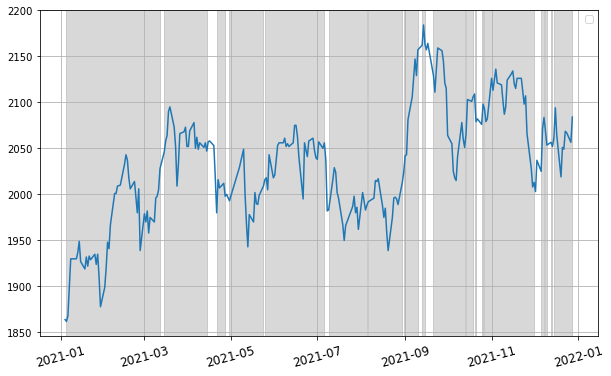

time : 3036.318346261978
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 56
update_count        : 13
best rewards        : 398.41480080441505
train reward


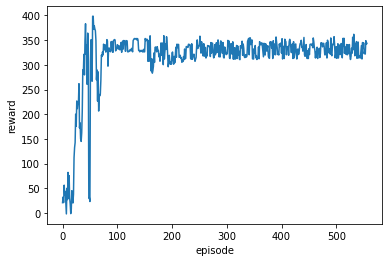

validate data reward


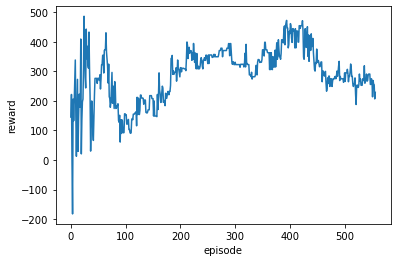

No handles with labels found to put in legend.


episode : 0
Get reward 228.5.
Trade count 20.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

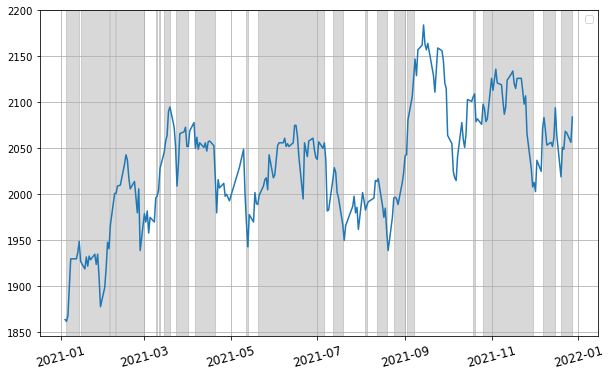

time : 1872.018387079239
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 75
update_count        : 17
best rewards        : 320.4843756392403
train reward


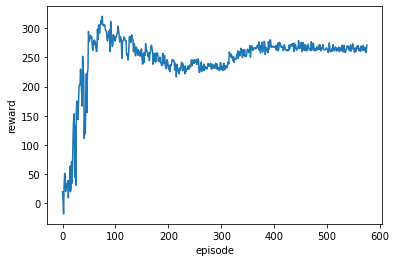

validate data reward


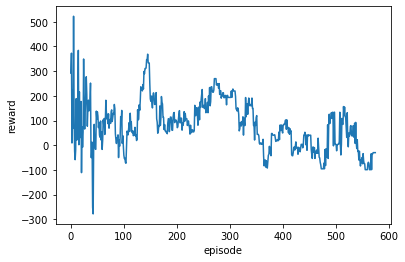

No handles with labels found to put in legend.


episode : 0
Get reward -30.0.
Trade count 20.
Tomorrow action : Action.SELL


<Figure size 432x288 with 0 Axes>

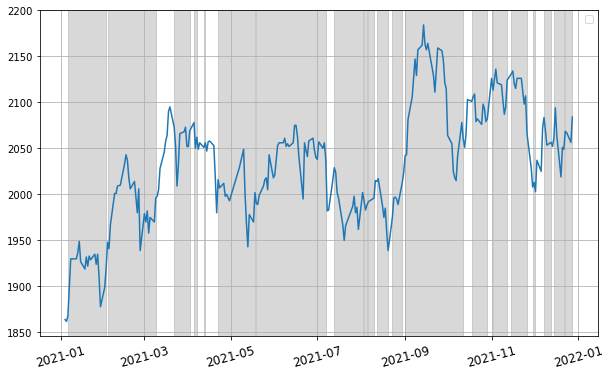

time : 1933.4505107402802
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 98
update_count        : 18
best rewards        : 350.9138399950615
train reward


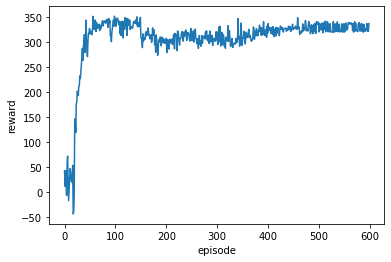

validate data reward


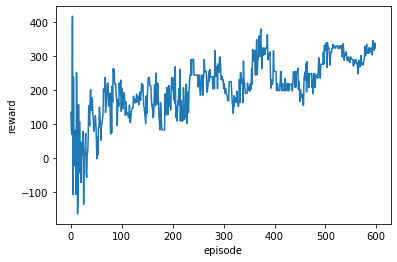

No handles with labels found to put in legend.


episode : 0
Get reward 323.0.
Trade count 24.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

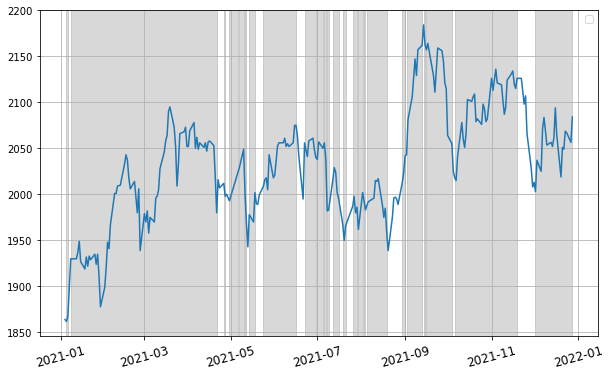

time : 2121.232335329056
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
Done Early Stopping
check_point episode : 129
update_count        : 6
best rewards        : 454.6236526790993
train reward


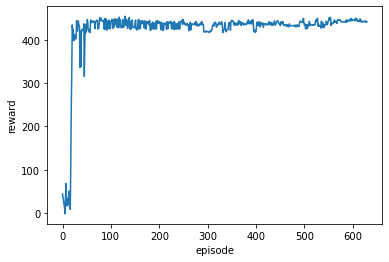

validate data reward


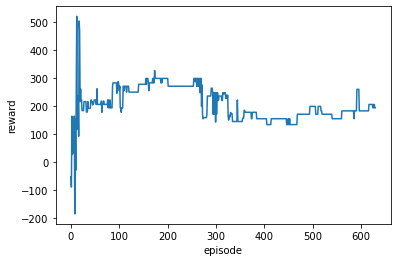

No handles with labels found to put in legend.


episode : 0
Get reward 194.0.
Trade count 3.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

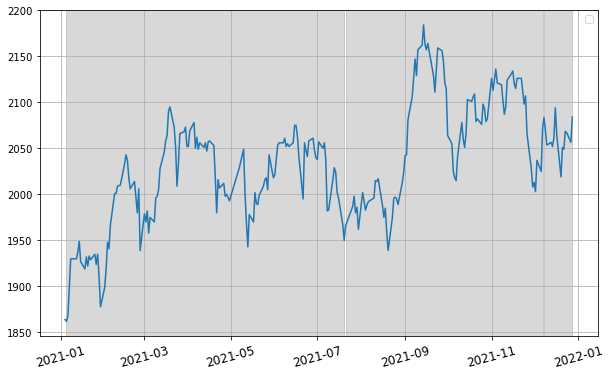

time : 2237.0727441310883
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
Done Early Stopping
check_point episode : 97
update_count        : 12
best rewards        : 378.74989365572526
train reward


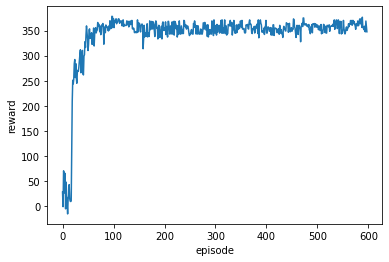

validate data reward


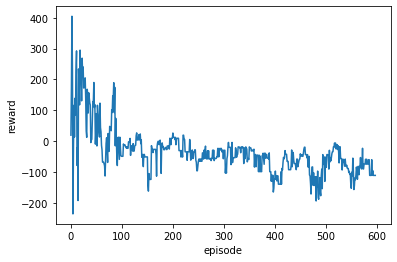

No handles with labels found to put in legend.


episode : 0
Get reward -111.5.
Trade count 13.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

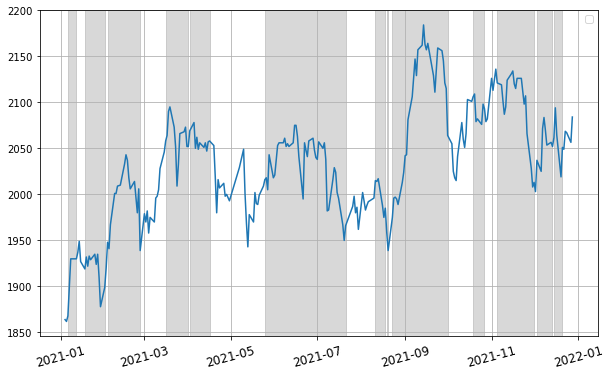

time : 2104.485592842102
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
Done Early Stopping
check_point episode : 257
update_count        : 24
best rewards        : 395.55408069443104
train reward


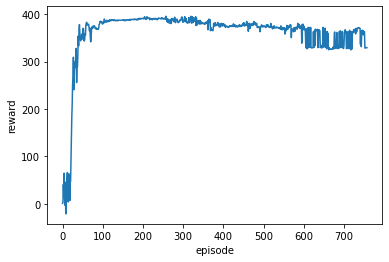

validate data reward


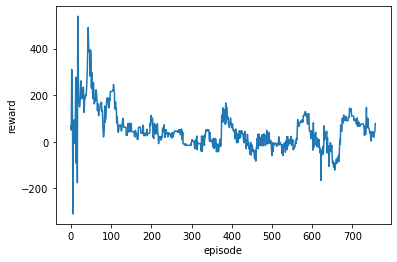

No handles with labels found to put in legend.


episode : 0
Get reward 78.0.
Trade count 20.
Tomorrow action : Action.SELL


<Figure size 432x288 with 0 Axes>

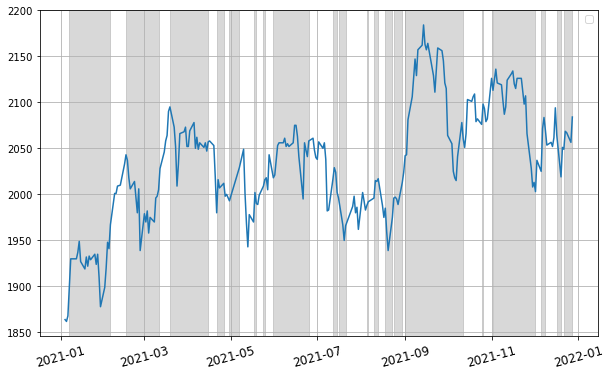

time : 2565.682796239853
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
Done Early Stopping
check_point episode : 130
update_count        : 25
best rewards        : 358.1239896555464
train reward


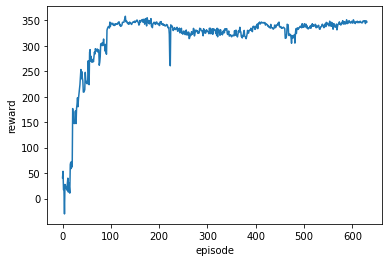

validate data reward


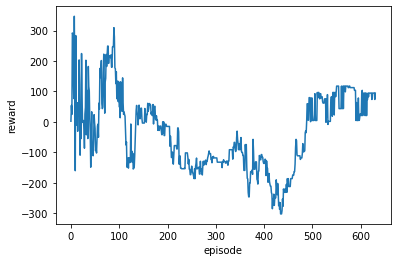

No handles with labels found to put in legend.


episode : 0
Get reward 94.5.
Trade count 21.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

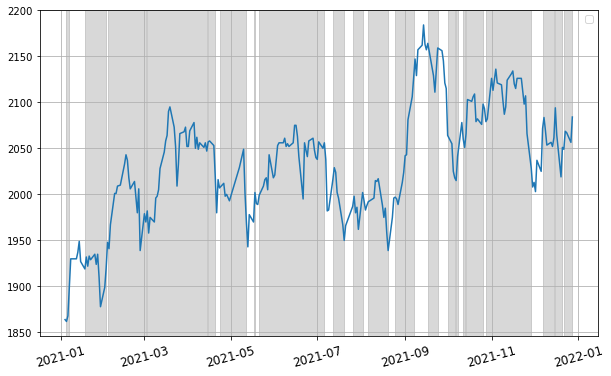

time : 2132.7221636772156
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
----------------------
episode : 800
----------------------
episode : 900
train reward


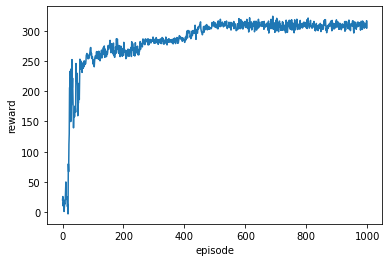

validate data reward


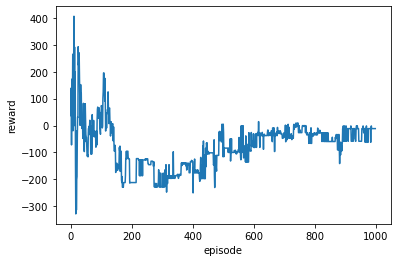

No handles with labels found to put in legend.


episode : 0
Get reward -11.5.
Trade count 21.
Tomorrow action : Action.STAY


<Figure size 432x288 with 0 Axes>

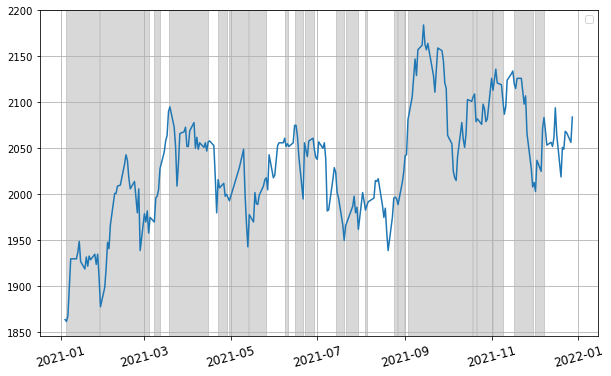

time : 3407.675013780594
*********************************
state    : std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_
env type : tanh
----------------------
episode : 0
Done initialization. From now, begin training!
----------------------
episode : 100
----------------------
episode : 200
----------------------
episode : 300
----------------------
episode : 400
----------------------
episode : 500
----------------------
episode : 600
----------------------
episode : 700
----------------------
episode : 800
----------------------
episode : 900
train reward


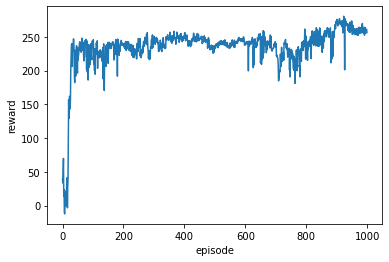

validate data reward


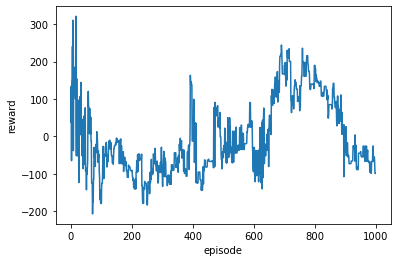

No handles with labels found to put in legend.


episode : 0
Get reward -99.0.
Trade count 12.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

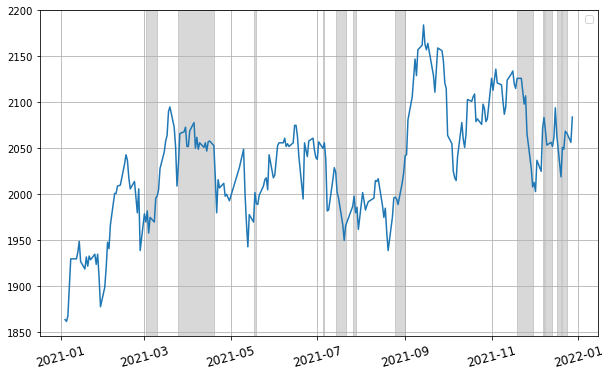

time : 3391.2646811008453
*********************************


In [17]:
# 1 episode 19s in mac

# lq.show_chart()
lq_dict = {}
episode_count=1000

# 'drop_proba'追加
states=[
    'std',
    'change_rate',
    'corr',
    'high_low',
    'close_open',
    'vec',
    'ema_vec',
    'macd',
    'skew',
    'kurt'
]
# state=['std','change_rate','moving_average']
lq_dummy = LearnQN(lx)
state_ , chart_ = lq_dummy.make_df_state(path_tpx,path_daw)
state_ ,chart_ = lq_dummy.make_state(path_tpx,path_daw,state_,chart_,states=states, ma_short=5,ma_long=25)

# profit なしにしてみる
env_types = ['sigmoid','tanh']



# time : 3129.7162601947784
for state in [states]:
    name=''
    for s in state:
        name+=(s+'_')
    for env_type in env_types:
        for is_sarsa in [True,False]:
            for i in range(10):
                start_time = time.time()
                lq = LearnQN(lx)
                print("state    :",name)
                print("env type :",env_type)
                lq.learn(path_tpx,path_daw,state_,chart_,env_type=env_type,episode_count=episode_count,train_year=2020,test_year=2021,is_sarsa=is_sarsa)
                lq_dict[name+env_type+'_'+str(is_sarsa)+'_'+str(i)] = lq
                end_time = time.time()
                print("time :",end_time -start_time)
                print("*********************************")
                


# milestone

In [220]:
lq_dummy = LearnQN(lx)
state_ , chart_ = lq_dummy.make_df_state(path_tpx,path_daw)
state_ ,chart_ = lq_dummy.make_state(path_tpx,path_daw,state_,chart_,states=state, ma_short=5,ma_long=25)
for i , key in enumerate(lq_dict):
    # print(lq_dict[key].state)
    s_check = state_[state_.index.year==2021]
    price_check = chart_[chart_.index.year==2021]
    env_check = Environment(s_check,price_check)
    wallet=2500
    lq_dict[key].QL_agent.return_profit_rate(env_check,wallet)
    break

In [5]:
save_path = '/Users/Owner/Desktop/'
with open(save_path+'lq_dict.pickle', 'rb') as f:
    lq_dict_copy = pickle.load(f)

In [18]:
save_path = '/Users/Owner/Desktop/'
with open(save_path+'lq_dict.pickle', 'wb') as f:
    pickle.dump(lq_dict, f)

In [19]:
lq_dict_copy = lq_dict

mean_train_reward_dict = {}
mean_test_reward_dict = {}
mean_pr_dict = {}
tmp_name = ''
error_list = []
state1=[
    'std',
    'change_rate',
    # 'moving_average',
    'corr',
    'high_low',
    'vec',
    'skew',
    'kurt'
]
for i,key in enumerate(lq_dict_copy):
    name = key[:-1]
    tmp_train_df = pd.DataFrame([0 for i in range(1000)])
    tmp_test_df = pd.DataFrame([0 for i in range(1000)])
    tmp_pr_df = pd.DataFrame()
    
    if name == tmp_name:
        continue
    print("\n\n\n")
    print("tmp_name",tmp_name)
    for i in range(10):
        
        # try:
        tmp_name = name
        lq_tmp = lq_dict_copy[tmp_name+str(i)]

        train_reward, test_reward = lq_tmp.return_reward_log()

        lq_tmp.state = state
        pr = lq_tmp.return_profit_rate(path_tpx,path_daw)
    
    
#         *********
        # s_check = state_[state_.index.year==2021]
        # price_check = chart_[chart_.index.year==2021]
        # env_check = Environment(s_check,price_check)
        # wallet=2500
        # lq_tmp.QL_agent.return_profit_rate(env_check,wallet)
# **********        
        pr = pr[pr.index.year==2021]
        

        tmp_pr_df[str(i)] = pr['eval_reward']


        df_train = pd.DataFrame(train_reward)
        df_train.rename(columns = {0:'reward'},inplace=True)
        tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
        tmp_train_df = tmp_train_df.fillna(0)


        df_test = pd.DataFrame(test_reward)#
        df_test.rename(columns = {0:'reward'},inplace=True)
        tmp_test_df = pd.merge(tmp_test_df,df_test,left_index=True,right_index=True,how='left')
        tmp_test_df = tmp_test_df.fillna(0)
        # except:
        #     error_list.append(tmp_name) 
        
    
    pr_ma = tmp_pr_df.mean(axis=1)
    pr_std = tmp_pr_df.std(axis=1)
    tmp_pr_df['ma'] = pr_ma
    tmp_pr_df['std'] = pr_std

    train_ma = tmp_train_df.mean(axis=1)
    train_std = tmp_train_df.std(axis=1)
    tmp_train_df['ma'] = train_ma
    tmp_train_df['std'] = train_std

    test_ma = tmp_test_df.mean(axis=1)
    test_std = tmp_test_df.std(axis=1)
    tmp_test_df['ma'] = test_ma
    tmp_test_df['std'] = test_std
    
    mean_pr_dict[tmp_name] = tmp_pr_df[['ma','std']]
    mean_train_reward_dict[tmp_name] = tmp_train_df[['ma','std']]
    mean_test_reward_dict[tmp_name] = tmp_test_df[['ma','std']]






tmp_name 


C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:55: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:61: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_test_df = pd.merge(tmp_test_df,df_test,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:55: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.p





tmp_name std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_sigmoid_True_


C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:55: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:61: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_test_df = pd.merge(tmp_test_df,df_test,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:55: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.p





tmp_name std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_sigmoid_False_


C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:55: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:61: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_test_df = pd.merge(tmp_test_df,df_test,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:55: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.p





tmp_name std_change_rate_corr_high_low_close_open_vec_ema_vec_macd_skew_kurt_tanh_True_


C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:55: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:61: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_test_df = pd.merge(tmp_test_df,df_test,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.py:55: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reward_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp_train_df = pd.merge(tmp_train_df,df_train,left_index=True,right_index=True,how='left')
C:\Users\Owner\AppData\Local\Temp/ipykernel_6704/2137307598.p

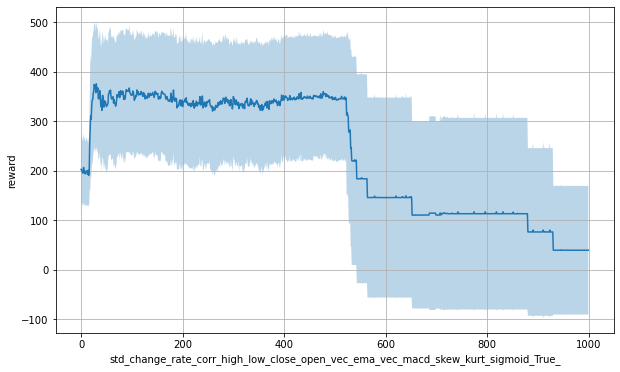

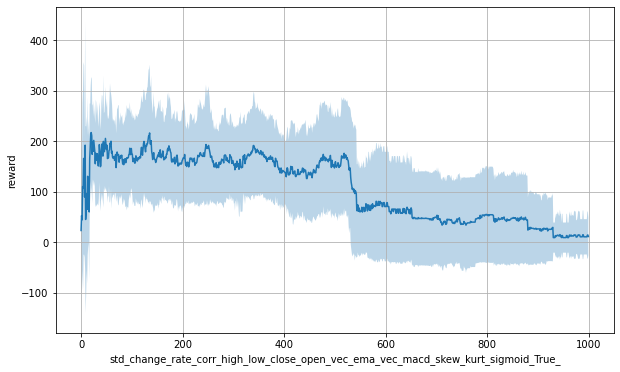

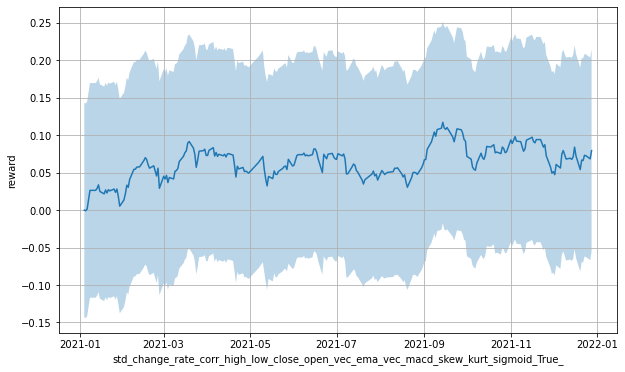

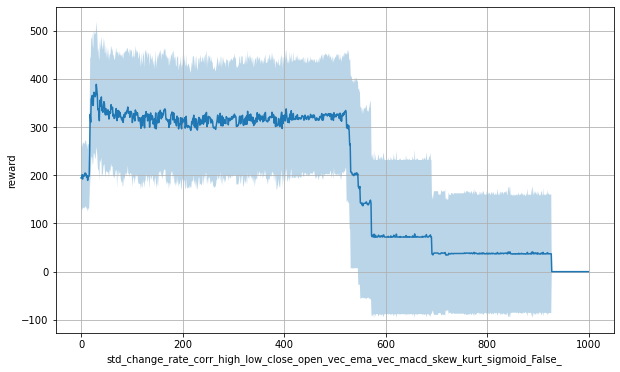

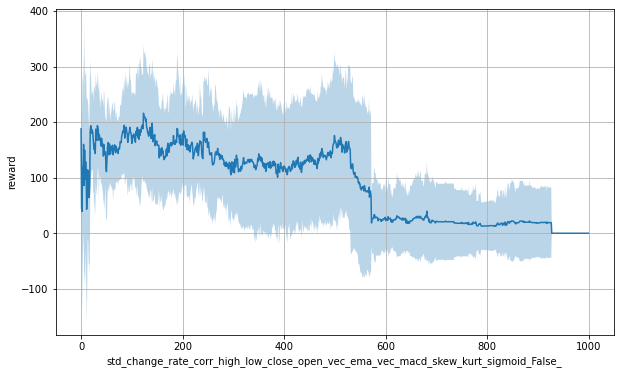

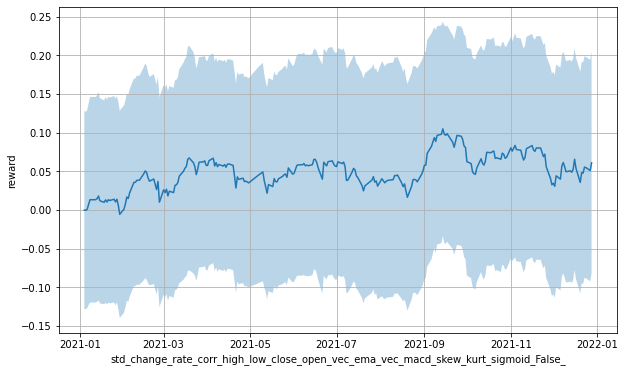

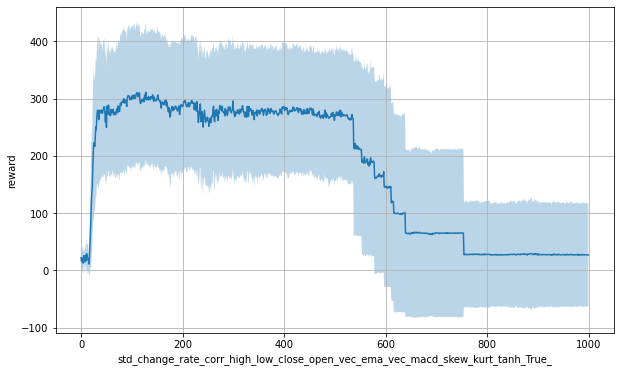

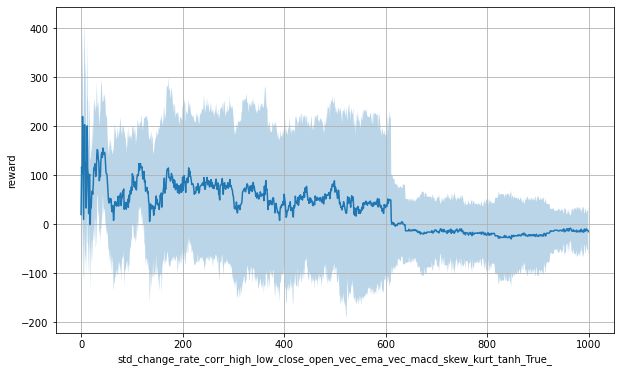

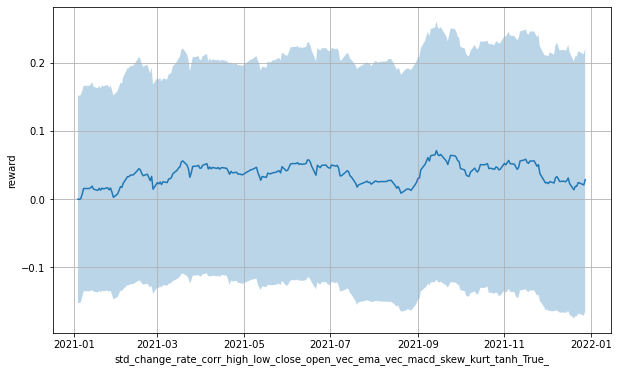

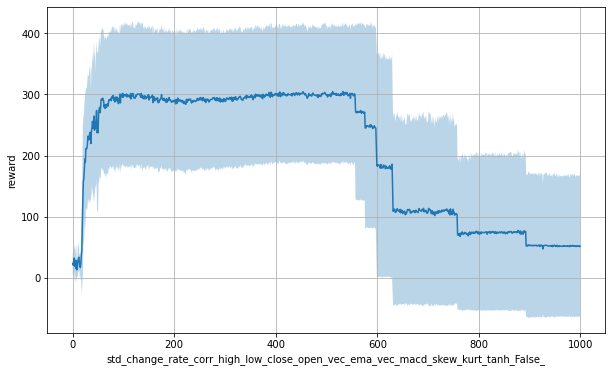

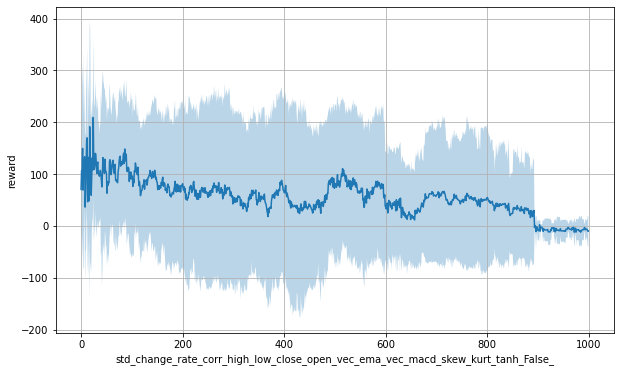

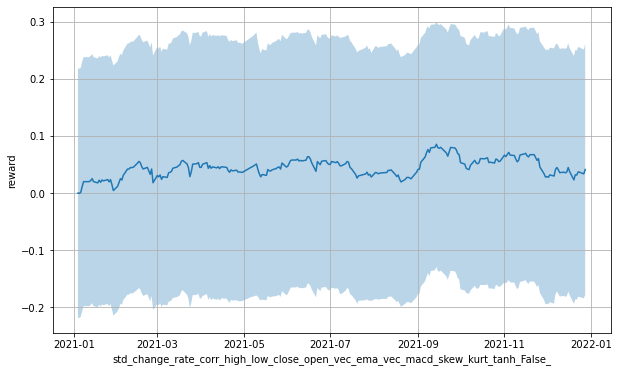

In [20]:

# # time : 3129.7162601947784
# for state in [state0,state1,state2,state3,state4,state5,state6,state7]:
#     name=''
#     for s in state:
#         name+=(s+'_')
#     for env_type in env_types:
       
error_key_list = []
#         for is_sarsa in [True,False]:
for i,key in enumerate(mean_train_reward_dict):
# key = name+env_type+'_'+str(is_sarsa)
    # print("\n\n\n")
    try:
        # print(key)
        # print("\n\n\n")
        # print("train")
        plot(mean_train_reward_dict[key],label=key)
        # print("\n\n\n")
        # print("test")
        plot(mean_test_reward_dict[key],label=key)
        # print("\n\n\n")
        # print("profit rate")
        delta = mean_pr_dict[key]['ma'].iloc[0]
        mean_pr_dict[key]['ma'] = mean_pr_dict[key]['ma'].map(lambda x:x-delta)
        plot(mean_pr_dict[key],label=key)
    except:
        error_key_list.append(key)
        # print("error key",key)


               

        

    
                         
    # print('key :',key)
    # train_reward, test_reward = lq_dict_copy[key].return_reward_log()
    # print("test_reward")
    # test_reward_dict = make_plot_data(test_reward,ma=19)
    # plot(test_reward_dict)
    # pr = lq_dict_copy[key].return_profit_rate(path_tpx,path_daw)
    # pr = pr[pr.index.year==2021]
    # easy_plot(pr['eval_reward'])
    # break
    

# milestone

In [15]:
with open(save_path+'lq_dict.pickle', 'wb') as f:
    pickle.dump(lq_dict, f)

In [27]:
with open(save_path+'lq_dict.pickle', 'rb') as f:
    lq_dict_copy = pickle.load(f)

chengerate だけやってない

In [8]:
lq_dict_copy

{'change_rate_moving_average_profit_True_0': <__main__.LearnQN at 0x21b0e4b0a30>,
 'change_rate_moving_average_profit_True_1': <__main__.LearnQN at 0x21b150dbfa0>,
 'change_rate_moving_average_profit_True_2': <__main__.LearnQN at 0x21b15b2d250>,
 'change_rate_moving_average_profit_True_3': <__main__.LearnQN at 0x21b1636b4c0>,
 'change_rate_moving_average_profit_True_4': <__main__.LearnQN at 0x21b173993d0>,
 'change_rate_moving_average_profit_True_5': <__main__.LearnQN at 0x21b17be49d0>,
 'change_rate_moving_average_profit_True_6': <__main__.LearnQN at 0x21b16793640>,
 'change_rate_moving_average_profit_True_7': <__main__.LearnQN at 0x21b19520c10>,
 'change_rate_moving_average_profit_True_8': <__main__.LearnQN at 0x21b1ad22220>,
 'change_rate_moving_average_profit_True_9': <__main__.LearnQN at 0x21b1b54bcd0>,
 'change_rate_moving_average_profit_False_0': <__main__.LearnQN at 0x21b1ca207f0>,
 'change_rate_moving_average_profit_False_1': <__main__.LearnQN at 0x21b186e9fd0>,
 'change_rate_

test_reward


C:\Users\Owner\AppData\Local\Temp/ipykernel_16824/161834169.py:1377: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_[column] = state_[column].map(lambda x:(x-mean_)/std_)


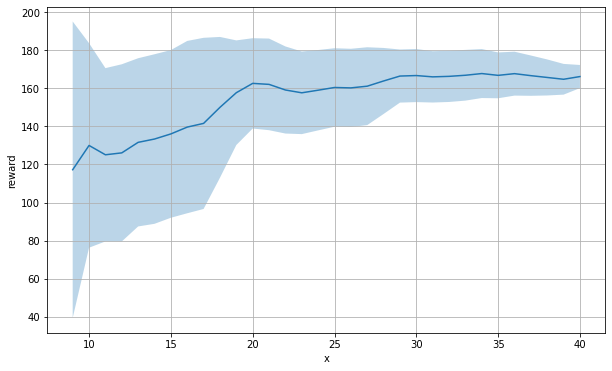

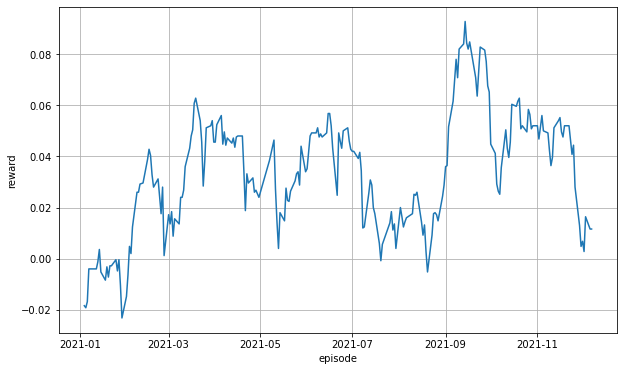

In [236]:
lq_tmp = lq_dict['std_change_rate_profit_True_0']
train_reward, test_reward = lq_tmp.return_reward_log()
print("test_reward")
test_reward_dict = make_plot_data(test_reward,ma=19)
plot(test_reward_dict)
pr = lq_tmp.return_profit_rate(path_tpx_sim,path_daw_sim)
pr = pr[pr.index.year==2021]
easy_plot(pr['eval_reward'])


In [9]:
path_tpx_sim = '/Users/Owner/Desktop/StockPriceData/TOPIX/TOPIX_20211208.csv'
# path_225 = '/Users/Owner/Desktop/StockPriceData/Stock_index/NK225_10years.csv'
path_daw_sim = '/Users/Owner/Desktop/StockPriceData/DAW/DAW_20211208.csv'
# path_bear = '/Users/Owner/Desktop/StockPriceData/Stock_index/R225BEAR_10years.csv'

# HERE!

In [100]:
len(mean_train_reward_dict)

48

In [11]:
len(mean_train_reward_dict)

6

In [114]:
mean_pr_dict

{'proba_profit_True_':                  ma       std
 day                          
 2021-01-04  0.03092  0.033900
 2021-01-05  0.03012  0.033900
 2021-01-06  0.03252  0.033900
 2021-01-07  0.04532  0.033900
 2021-01-08  0.05612  0.037597
 ...             ...       ...
 2021-12-01  0.08236  0.079569
 2021-12-02  0.07876  0.078361
 2021-12-03  0.09100  0.082474
 2021-12-06  0.08668  0.081020
 2021-12-07  0.10332  0.063129
 
 [228 rows x 2 columns],
 'proba_profit_False_':                  ma       std
 day                          
 2021-01-04  0.02552  0.022956
 2021-01-05  0.02472  0.022956
 2021-01-06  0.02712  0.022956
 2021-01-07  0.03864  0.026674
 2021-01-08  0.04824  0.027794
 ...             ...       ...
 2021-12-01  0.06800  0.048653
 2021-12-02  0.06400  0.048653
 2021-12-03  0.07760  0.048653
 2021-12-06  0.07376  0.047169
 2021-12-07  0.08720  0.065368
 
 [228 rows x 2 columns],
 'proba_sigmoid_True_':                  ma       std
 day                          
 2021-01-0

In [218]:
error_list

[]

# 累積収益率
$$
累積収益率 = \frac{累積報酬}{元本}
$$

In [309]:

pr = lq.return_profit_rate(path_tpx_sim,path_daw_sim)
pr = pr[pr.index.year==2021]
# pr.plot()

reward


KeyError: 'ma'

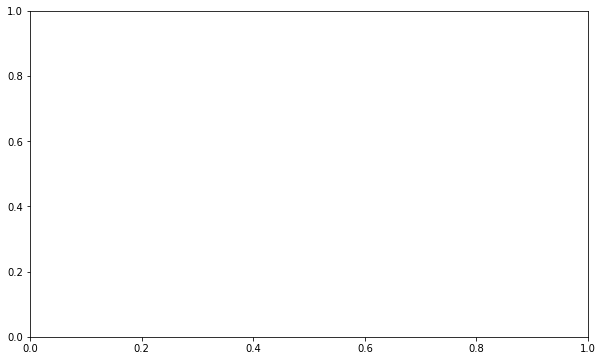

In [291]:
reward_log,test_reward_log = lq.return_reward_log()
print("reward")
reward_dict = make_plot_data(reward_log,ma=19)
plot(reward_dict)


test_reward


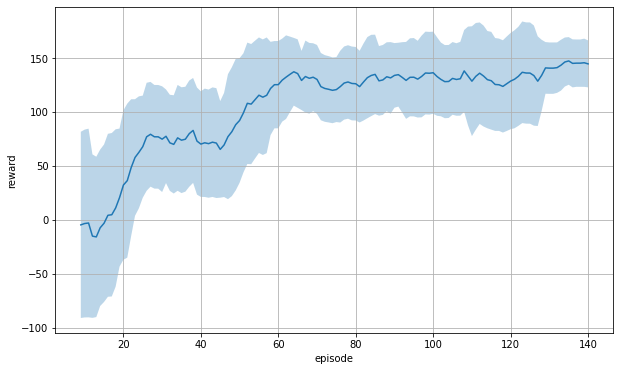

In [205]:
print("test_reward")
test_reward_dict = make_plot_data(test_reward_log,ma=19)
plot(test_reward_dict)

# Preict tomorrow

No handles with labels found to put in legend.


today : 2021-11-18 00:00:00
episode : 0
Get reward -5.0.
Trade count 6.
Tomorrow action : Action.BUY


<Figure size 432x288 with 0 Axes>

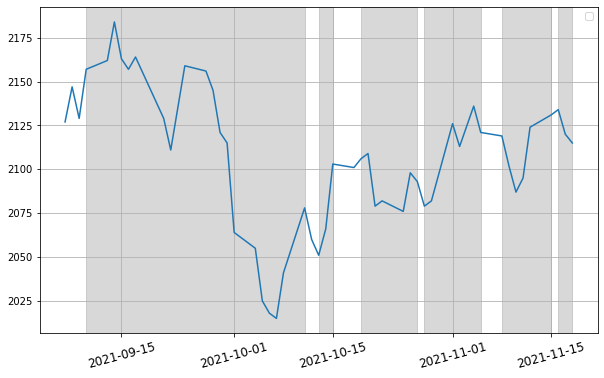

In [31]:
predict_tomorrow(lq_dict['tanhFalse'],folder_name='TOPIX')

# save model

In [135]:
save_path =  '/Users/rince/Desktop/Sotsuron/code/model/RL/Qagent/hoge'
lq.save(save_path)

# load model

---------------------
AUC train: 0.860577203982112
AUC test : 0.6767285722020684
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       219
           1       0.65      0.65      0.65       253

    accuracy                           0.63       472
   macro avg       0.63      0.63      0.63       472
weighted avg       0.63      0.63      0.63       472



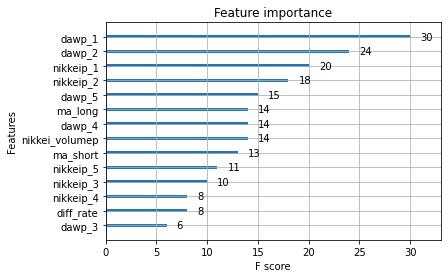

In [136]:
lq_copy = LearnQN.load(save_path+'hoge.pickle')

# 今後の方針

1. モデル別収益率返却関数の実装
2. シャープレシオ関数の実装
SharpRatio = (PrfitRate - const)\(Risk)
3. early_stopping機能の実装

# 累積収益率　比較

# Technical

# Path SIM

In [24]:
path_tpx_sim = '/Users/rince/Desktop/StockPriceData/TOPIX/TOPIX_20211102.csv'
path_daw_sim = '/Users/rince/Desktop/StockPriceData/DAW/DAW_20211102.csv'

In [11]:
df_tpx = DataFramePreProcessing(path_tpx_sim).load_df()

<Figure size 432x288 with 0 Axes>

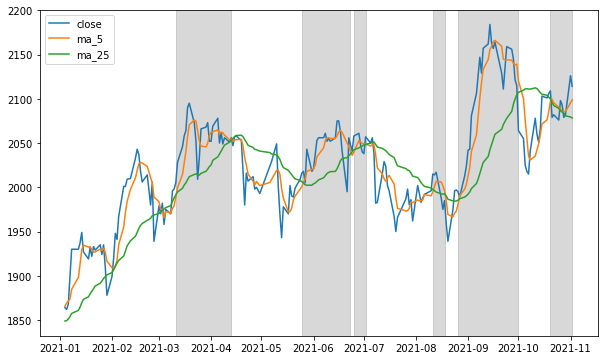

In [273]:
ts = TechnicalSimulation(hold_day=100,year=2021)
pr_log_t =  ts.return_profit_rate(path_tpx_sim)

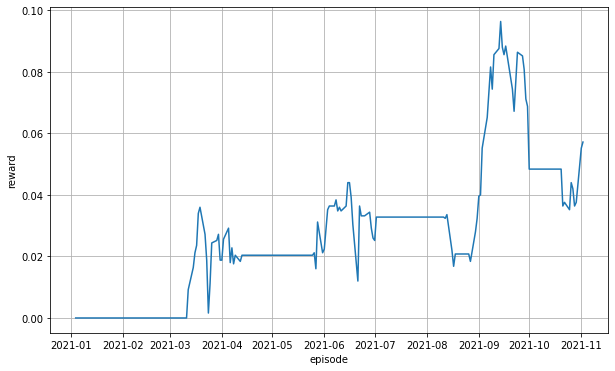

In [274]:

easy_plot(pr_log_t[pr_log_t.index.year==2021]['eval_reward'])

# TOPIX

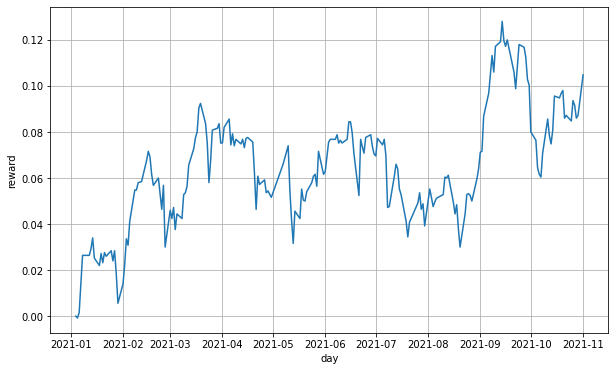

In [271]:
xs = XGBSimulation(lq.lx.model)
df_con = xs.make_df_con(path_tpx_sim,path_daw_sim)
df_con = df_con[df_con.index.year == 2021]
df_con['close']
pr_log_tpx = pd.DataFrame()
pr_log_tpx.index = df_con.index
wallet = 2500
pr_log_tpx['reward'] = df_con['close'].map(lambda x:x - df_con['close'].iloc[0])
pr_log_tpx['reward'] = pr_log_tpx['reward'].map(lambda x:x/wallet)
easy_plot(pr_log_tpx,xlabel='day')

# XGB

---------------------
AUC train: 0.860577203982112
AUC test : 0.6767285722020684
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       219
           1       0.65      0.65      0.65       253

    accuracy                           0.63       472
   macro avg       0.63      0.63      0.63       472
weighted avg       0.63      0.63      0.63       472



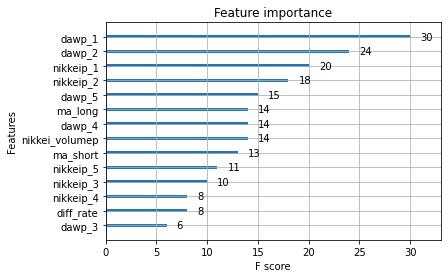

In [155]:
lx = LearnXGB()
lx.learn_xgb(path_tpx,path_daw)

# XGB online学習

In [20]:
lx = LearnXGB()
lx.learn_xgb(path_tpx,path_daw)

In [45]:
acc_df

score  Up precision  Down precision  Up recall  Down recall  up_num  \
0  0.54185      0.559322        0.522936   0.559322     0.522936   118.0   

   down_num  
0     109.0

No handles with labels found to put in legend.


[18:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

No handles with labels found to put in legend.


[18:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

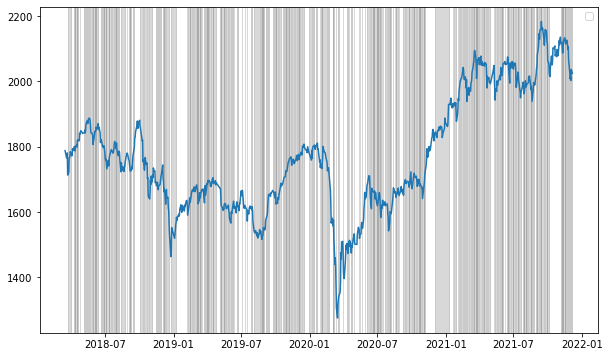

In [44]:
sl = XGBSimulation(lx.model,alpha=0.5)
pr_log_online = sl.return_profit_rate(path_tpx_sim,path_daw_sim,is_online=True)
acc_df = sl.return_accuracy(path_tpx_sim,path_daw_sim,is_online=True)

In [232]:
pr_log = pr_log[pr_log.index.year==2021]
pr_log

reward  eval_reward
2021-01-04 -0.0012      -0.0108
2021-01-05 -0.0012      -0.0012
2021-01-06 -0.0092      -0.0092
2021-01-07 -0.0092      -0.0092
2021-01-08 -0.0092       0.0028
...            ...          ...
2021-10-25  0.1172       0.1172
2021-10-26  0.1172       0.1172
2021-10-27  0.1172       0.1172
2021-10-28  0.1172       0.1172
2021-10-29  0.1172       0.1172

[203 rows x 2 columns]

In [233]:
pr_log_online = pr_log_online[pr_log_online.index.year==2021]
pr_log_online

reward  eval_reward
2021-01-04  0.0640       0.0716
2021-01-05  0.0640       0.0708
2021-01-06  0.0640       0.0732
2021-01-07  0.0640       0.0640
2021-01-08  0.0980       0.0980
...            ...          ...
2021-10-25  0.0344       0.0344
2021-10-26  0.0344       0.0344
2021-10-27  0.0344       0.0344
2021-10-28  0.0344       0.0344
2021-10-29  0.0344       0.0344

[203 rows x 2 columns]

No handles with labels found to put in legend.


[17:53:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 432x288 with 0 Axes>

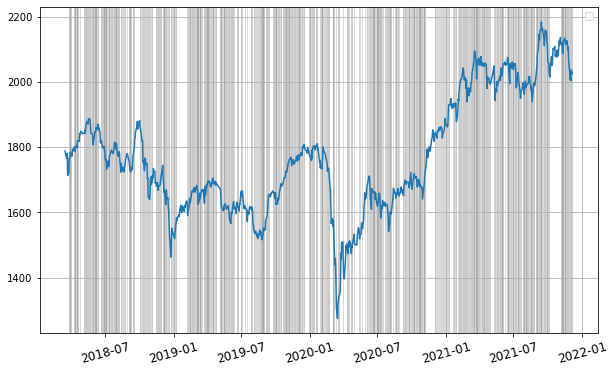

No handles with labels found to put in legend.


[17:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 432x288 with 0 Axes>

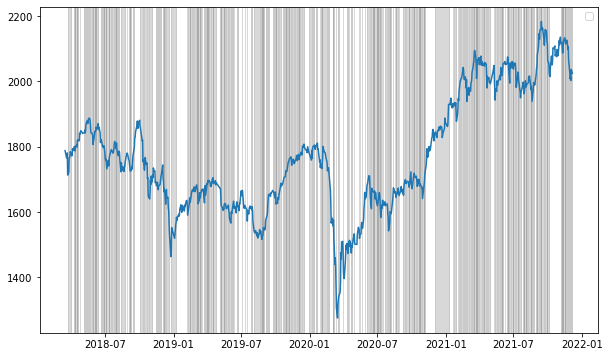

In [9]:
sl = XGBSimulation(lx.model,alpha=0.5)
sl.simulate(path_tpx_sim, path_daw_sim, is_validate=False,strategy='normal',is_online=True)
pr_log_online = sl.return_profit_rate(path_tpx_sim,path_daw_sim,is_online=True)


No handles with labels found to put in legend.


Total profit :606.0
Trade count  :153
Max profit   :93.0
Min profit   :-312.0
Mean profit  :3.9607843137254903
      score  Up precision  Down precision  Up recall  Down recall    num
0  0.501104      0.520979        0.491935   0.321121     0.690045  906.0



<Figure size 432x288 with 0 Axes>

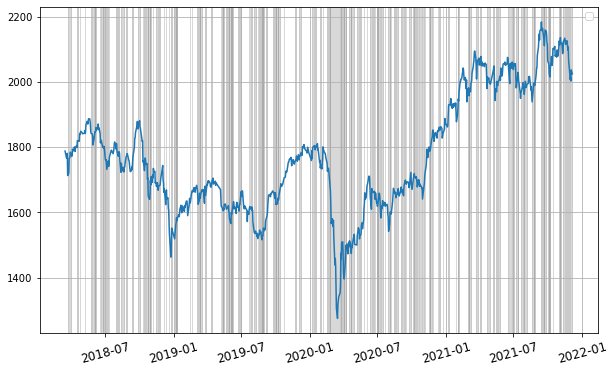

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

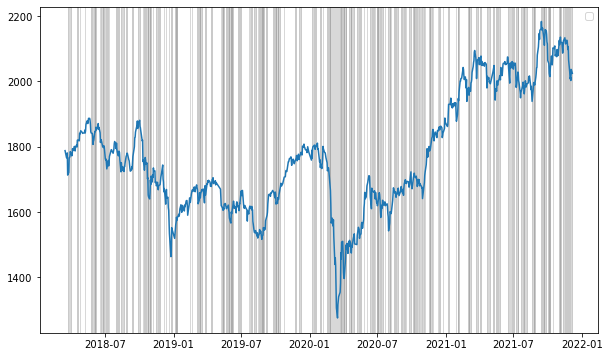

In [10]:
sl = XGBSimulation(lx.model,alpha=0.5)
sl.simulate(path_tpx_sim, path_daw_sim, is_validate=False,strategy='normal',is_online=False)
pr_log = sl.return_profit_rate(path_tpx_sim,path_daw_sim)




*************************
alpha : 0.5


No handles with labels found to put in legend.


Total profit :686.0
Trade count  :576
Max profit   :170.0
Min profit   :-92.0
Mean profit  :1.1909722222222223
      score  Up precision  Down precision  Up recall  Down recall     num
0  0.747034      0.741985        0.753333   0.789602      0.70062  2360.0



<Figure size 432x288 with 0 Axes>

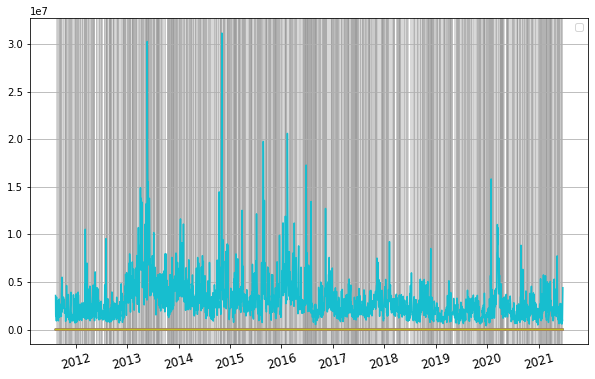

No handles with labels found to put in legend.
<ipython-input-276-4be54fa5dcb7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-276-4be54fa5dcb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


*************************
alpha : 0.6


No handles with labels found to put in legend.


Total profit :1010.0
Trade count  :338
Max profit   :184.0
Min profit   :-103.0
Mean profit  :2.9881656804733727
      score  Up precision  Down precision  Up recall  Down recall     num
0  0.837491       0.83697        0.838141    0.86587     0.804615  1403.0



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

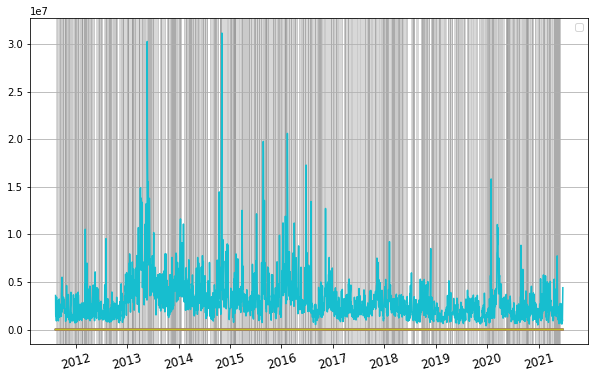

No handles with labels found to put in legend.
<ipython-input-276-4be54fa5dcb7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-276-4be54fa5dcb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


*************************
alpha : 0.7


No handles with labels found to put in legend.


Total profit :1117.0
Trade count  :213
Max profit   :186.0
Min profit   :-104.0
Mean profit  :5.244131455399061
      score  Up precision  Down precision  Up recall  Down recall    num
0  0.901073       0.88764        0.916244   0.922897     0.878345  839.0



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

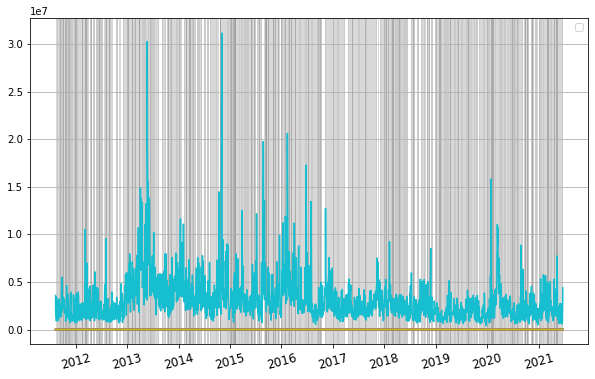

No handles with labels found to put in legend.
<ipython-input-276-4be54fa5dcb7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-276-4be54fa5dcb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


*************************
alpha : 0.8


No handles with labels found to put in legend.


Total profit :1359.0
Trade count  :106
Max profit   :214.0
Min profit   :-115.0
Mean profit  :12.820754716981131
      score  Up precision  Down precision  Up recall  Down recall    num
0  0.939785      0.928287        0.953271   0.958848     0.918919  465.0



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

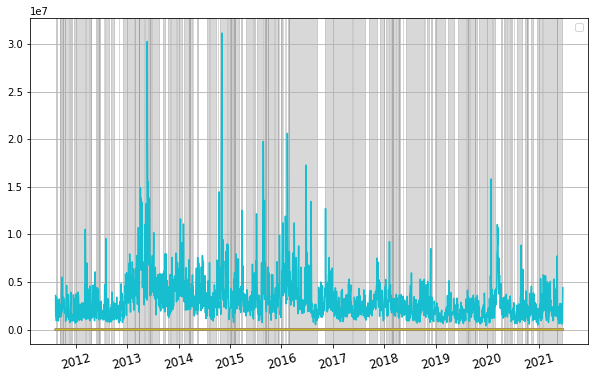

No handles with labels found to put in legend.
<ipython-input-276-4be54fa5dcb7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-276-4be54fa5dcb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


*************************
alpha : 0.9


No handles with labels found to put in legend.


Total profit :589.0
Trade count  :19
Max profit   :492.0
Min profit   :-306.0
Mean profit  :31.0
      score  Up precision  Down precision  Up recall  Down recall   num
0  0.977011      0.979167        0.974359   0.979167     0.974359  87.0



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

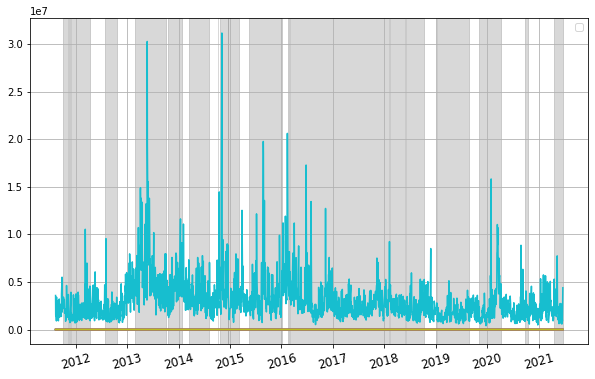

No handles with labels found to put in legend.
<ipython-input-276-4be54fa5dcb7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-276-4be54fa5dcb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


<Figure size 432x288 with 0 Axes>

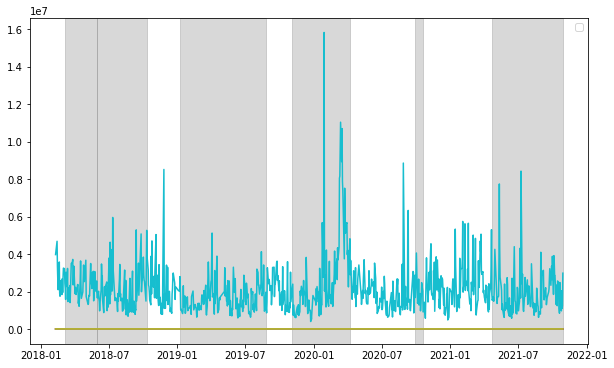

In [276]:
pr_log_xn = {}
for alpha in [0.5,0.6,0.7,0.8,0.9]:
    print("*************************")
    print('alpha :',alpha)
    sl = XGBSimulation(lq.lx.model,alpha=alpha)
    sl.simulate(path_tpx, path_daw, is_validate=False,strategy='normal')
    pr_tmp = sl.return_profit_rate(path_tpx_sim,path_daw_sim,wallet=2500,strategy='normal')
    pr_tmp = pr_tmp[pr_tmp.index.year==2021]
    pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
    pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])
    pr_log_xn[alpha] = pr_tmp

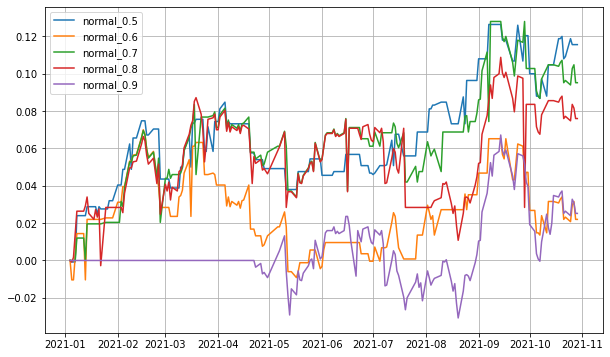

In [277]:
plt.subplots(figsize=(10, 6))
plt.plot(pr_log_xn[0.5]['eval_reward'],label='normal_0.5')
plt.plot(pr_log_xn[0.6]['eval_reward'],label='normal_0.6')
plt.plot(pr_log_xn[0.7]['eval_reward'],label='normal_0.7')
plt.plot(pr_log_xn[0.8]['eval_reward'],label='normal_0.8')
plt.plot(pr_log_xn[0.9]['eval_reward'],label='normal_0.9')
plt.legend()
plt.grid(True)
plt.show()

*************************
alpha : 0.5


No handles with labels found to put in legend.


Total profit :537.0
Trade count  :577
Max profit   :116.0
Min profit   :-186.0
Mean profit  :0.9306759098786829
      score  Up precision  Down precision  Up recall  Down recall     num
0  0.747034      0.741985        0.753333   0.789602      0.70062  2360.0



<Figure size 432x288 with 0 Axes>

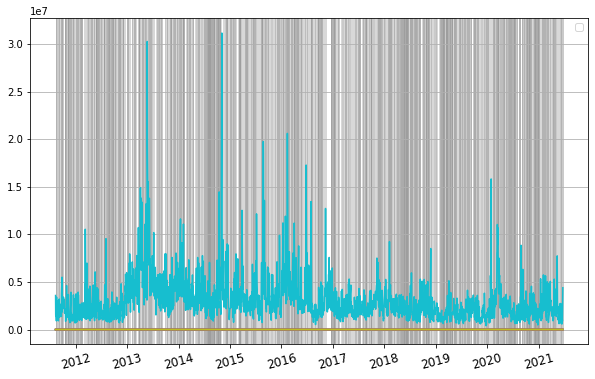

No handles with labels found to put in legend.
<ipython-input-279-e909452a84cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-279-e909452a84cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


*************************
alpha : 0.6


No handles with labels found to put in legend.


Total profit :213.0
Trade count  :339
Max profit   :116.0
Min profit   :-170.0
Mean profit  :0.6283185840707964
      score  Up precision  Down precision  Up recall  Down recall     num
0  0.837491       0.83697        0.838141    0.86587     0.804615  1403.0



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

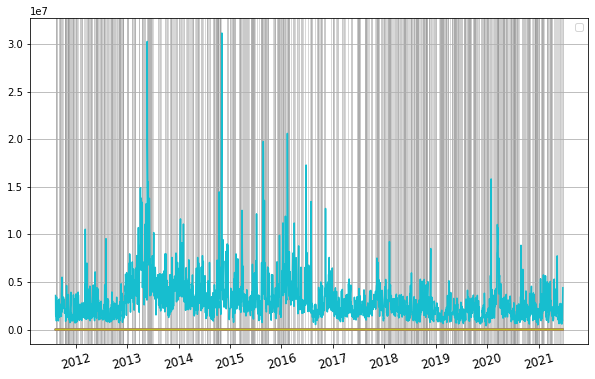

No handles with labels found to put in legend.
<ipython-input-279-e909452a84cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-279-e909452a84cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


*************************
alpha : 0.7


No handles with labels found to put in legend.


Total profit :106.0
Trade count  :214
Max profit   :140.0
Min profit   :-179.0
Mean profit  :0.4953271028037383
      score  Up precision  Down precision  Up recall  Down recall    num
0  0.901073       0.88764        0.916244   0.922897     0.878345  839.0



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

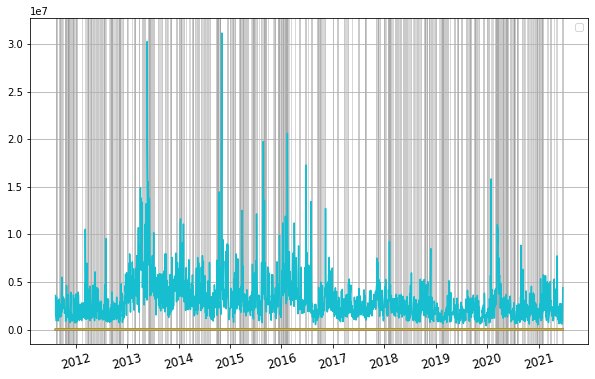

No handles with labels found to put in legend.
<ipython-input-279-e909452a84cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-279-e909452a84cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


*************************
alpha : 0.8


No handles with labels found to put in legend.


Total profit :-144.0
Trade count  :106
Max profit   :95.0
Min profit   :-163.0
Mean profit  :-1.3584905660377358
      score  Up precision  Down precision  Up recall  Down recall    num
0  0.939785      0.928287        0.953271   0.958848     0.918919  465.0



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

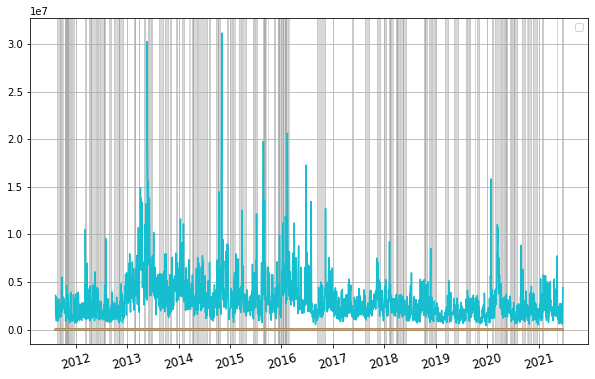

No handles with labels found to put in legend.
<ipython-input-279-e909452a84cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-279-e909452a84cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


*************************
alpha : 0.9


No handles with labels found to put in legend.


Total profit :651.0
Trade count  :19
Max profit   :328.0
Min profit   :-193.0
Mean profit  :34.26315789473684
      score  Up precision  Down precision  Up recall  Down recall   num
0  0.977011      0.979167        0.974359   0.979167     0.974359  87.0



<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

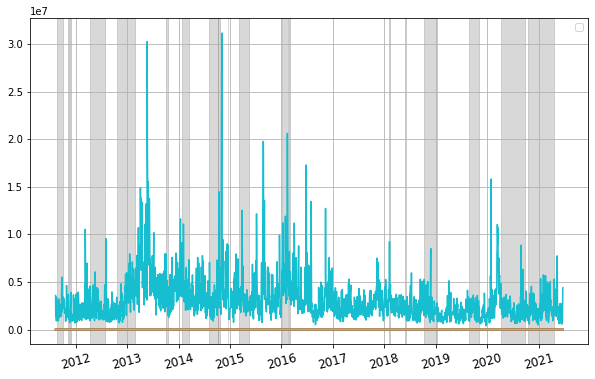

No handles with labels found to put in legend.
<ipython-input-279-e909452a84cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
<ipython-input-279-e909452a84cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])


<Figure size 432x288 with 0 Axes>

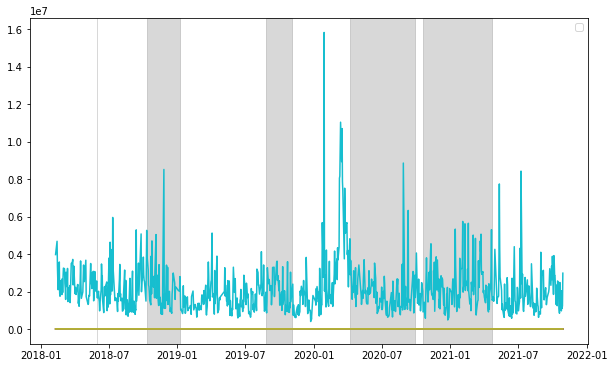

In [279]:
pr_log_xr = {}
for alpha in [0.5,0.6,0.7,0.8,0.9]:
    print("*************************")
    print('alpha :',alpha)
    sl = XGBSimulation(lq.lx.model,alpha=alpha)
    sl.simulate(path_tpx, path_daw, is_validate=False,strategy='reverse')
    pr_tmp = sl.return_profit_rate(path_tpx_sim,path_daw_sim,wallet=2500,strategy='reverse')
    pr_tmp = pr_tmp[pr_tmp.index.year==2021]
    pr_tmp['reward'] = pr_tmp['reward'].map(lambda x:x - pr_tmp['reward'].iloc[0])
    pr_tmp['eval_reward'] = pr_tmp['eval_reward'].map(lambda x:x - pr_tmp['eval_reward'].iloc[0])
    pr_log_xr[alpha] = pr_tmp

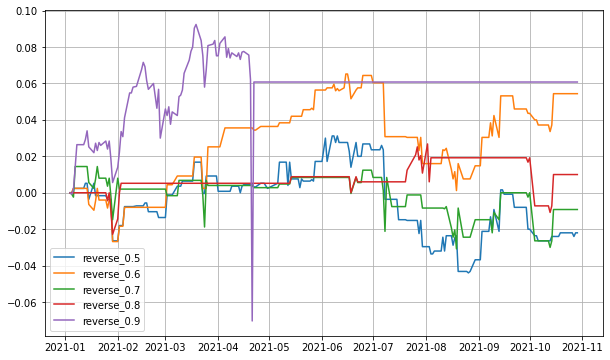

In [280]:
plt.subplots(figsize=(10, 6))
plt.plot(pr_log_xr[0.5]['eval_reward'],label='reverse_0.5')
plt.plot(pr_log_xr[0.6]['eval_reward'],label='reverse_0.6')
plt.plot(pr_log_xr[0.7]['eval_reward'],label='reverse_0.7')
plt.plot(pr_log_xr[0.8]['eval_reward'],label='reverse_0.8')
plt.plot(pr_log_xr[0.9]['eval_reward'],label='reverse_0.9')
plt.legend()
plt.grid(True)
plt.show()

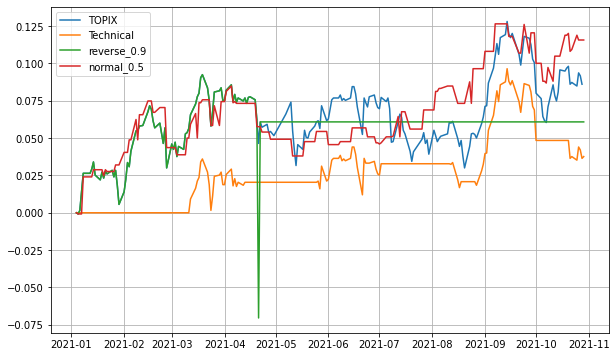

In [284]:
plt.subplots(figsize=(10, 6))
plt.plot(pr_log_tpx['reward'].iloc[:-2],label='TOPIX')
plt.plot(pr_log_t[pr_log_t.index.year==2021]['eval_reward'].iloc[:-2],label='Technical')
plt.plot(pr_log_xr[0.9]['eval_reward'],label='reverse_0.9')
plt.plot(pr_log_xn[0.5]['eval_reward'],label='normal_0.5')
plt.legend()
plt.grid(True)
plt.show()

In [196]:
len(pr_log_t[pr_log_t.index.year==2021].iloc[:-2])

203

In [195]:
len(pr_log_xr[0.5]['eval_reward'])

203

# Scaler

In [362]:
df_tpx = DataFramePreProcessing(path_tpx).load_df()

In [364]:
df_tpx.head()

open   high    low  close     volume
day                                              
2011-06-23  849.0  855.0  848.0  851.0  1149460.0
2011-06-24  852.0  860.0  852.0  859.0  1527150.0
2011-06-27  857.0  857.0  849.0  852.0  6783400.0
2011-06-28  857.0  860.0  852.0  855.0  2429060.0
2011-06-29  866.0  869.0  863.0  868.0  1810540.0

In [372]:
scaler = StandardScaler() 
estimator = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1)
model = Pipeline([("scaler", scaler), ("estimator", estimator)])

states = df_tpx.values
scaled = model.named_steps["scaler"].fit(states).transform(states)


In [371]:
scaler.transform(states)

array([[-1.62193254, -1.6225093 , -1.60770311, -1.61657607, -0.81489361],
       [-1.61358142, -1.60862421, -1.59652576, -1.59429939, -0.64986528],
       [-1.59966289, -1.61695526, -1.60490878, -1.61379149,  1.64680705],
       ...,
       [ 1.75748663,  1.73212831,  1.72594352,  1.69707982, -0.93513547],
       [ 1.59324797,  1.57939232,  1.56387184,  1.56898892,  0.60278842],
       [ 1.6990288 ,  1.71824322,  1.70917748,  1.73884859, -0.09529073]])

In [377]:
a_ = np.array([[float(i) for i in range(3)] for j in range(2)])

In [378]:
a_

array([[0., 1., 2.],
       [0., 1., 2.]])

これ縦で標準化してる

In [380]:
# scaled = model.named_steps["scaler"].fit(a_).transform(a_)
scaled = scaler.transform(a_)
scaled

array([[0., 0., 0.],
       [0., 0., 0.]])

In [46]:
a_ = [1,2,3]
a_ = np.array(a_)

# scaled = scaler.transform(a_)
# scaled

In [47]:
a_

array([1, 2, 3])

In [48]:
preprocessing.scale(a_,axis=0)
# たて

array([-1.22474487,  0.        ,  1.22474487])

In [50]:
preprocessing.scale(a_,axis=1)
# ヨコ

array([-1.22474487,  0.        ,  1.22474487])

# Grid search

In [7]:
lx = LearnXGB()
x_train,y_train,x_test,y_test = lx.make_xgb_data(path_tpx,path_daw,test_rate=0.80)


In [15]:
grid_search(x_train,y_train,x_test,y_test)

# milestone

param1

In [13]:
{'eta': 0.10133010936006664, 'max_depth': 3, 'lambda': 0.7688766095080382, 'n_estimators': 4, 'reg_alpha': 0.5752333513767293, 'reg_lambda': 0.3639652652940705, 'importance_type': 'total_cover'}

{'eta': 0.10133010936006664,
 'max_depth': 3,
 'lambda': 0.7688766095080382,
 'n_estimators': 4,
 'reg_alpha': 0.5752333513767293,
 'reg_lambda': 0.3639652652940705,
 'importance_type': 'total_cover'}

param2

In [14]:
{'eta': 0.09596830907961507, 'max_depth': 3, 'lambda': 0.7357580506094586, 'n_estimators': 3, 'reg_alpha': 0.6480353642599526, 'reg_lambda': 0.48699139703134453, 'importance_type': 'total_cover'}

{'eta': 0.09596830907961507,
 'max_depth': 3,
 'lambda': 0.7357580506094586,
 'n_estimators': 3,
 'reg_alpha': 0.6480353642599526,
 'reg_lambda': 0.48699139703134453,
 'importance_type': 'total_cover'}

# param1

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


---------------------
AUC train: 0.719021775770242
AUC test : 0.678822170483874
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       219
           1       0.63      0.76      0.69       253

    accuracy                           0.63       472
   macro avg       0.63      0.62      0.62       472
weighted avg       0.63      0.63      0.62       472



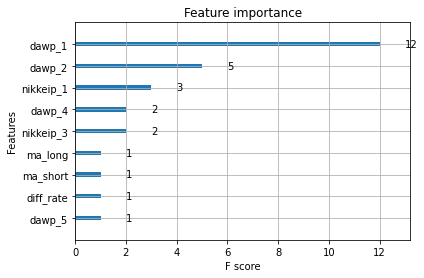

In [17]:
xgb_model = xgb_pred(x_train,y_train,x_test,y_test)

# param2

---------------------
AUC train: 0.7176032045663948
AUC test : 0.6818542783402819
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       219
           1       0.63      0.76      0.69       253

    accuracy                           0.63       472
   macro avg       0.63      0.62      0.62       472
weighted avg       0.63      0.63      0.62       472



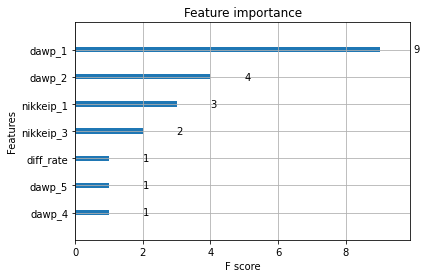

In [22]:
xgb_model = xgb_pred(x_train,y_train,x_test,y_test)

# Gridsearch の結果
param2の feature importanceからparam2の方がdawp1以外の特徴が活用されているため, param2を採用

#  新型earlystopping入れた方が良さそう

In [21]:
output_size = 3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(4,),activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(output_size,activation='relu'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [23]:
model.get_weights()

[array([[-0.6257985 , -0.10235113, -0.19183084,  0.24913949, -0.06132072,
          0.00136602, -0.08042353,  0.41224682, -0.5247485 ,  0.3420375 ],
        [ 0.56559324,  0.57881784,  0.49784207, -0.37229285, -0.07113403,
         -0.6504112 , -0.30349144,  0.08890188, -0.21786743, -0.04988366],
        [-0.5713546 , -0.2747286 ,  0.28947127,  0.4713577 , -0.3420397 ,
         -0.344274  , -0.1231159 ,  0.13403583, -0.49366707, -0.53970283],
        [-0.5717225 , -0.5172146 ,  0.6393776 , -0.5344424 ,  0.61687243,
          0.63122416, -0.12219113,  0.39219213,  0.29173708, -0.32685423]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.24401557,  0.04437608,  0.26674402],
        [-0.49995464, -0.3675348 ,  0.62434137],
        [-0.3144648 ,  0.23688662, -0.4281087 ],
        [-0.27285525,  0.302867  ,  0.01026928],
        [-0.5814016 , -0.04639101, -0.5187259 ],
        [ 0.00614476, -0.23307991, -0.63258064],
        [ 0.37108898,

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                50        
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()[1]

# import tensorflow as tf
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

start_time = time.time()
tf.debugging.set_log_device_placement(True)
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)
print("time :",time.time()-start_time)

Num GPUs Available:  1
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
time : 0.003989458084106445


In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [15]:
tf.test.gpu_device_name()

'/device:GPU:0'